# Column Definitions:

ir_value - Distance measured with the LiDAR sensor

ir_strength - Signal strength from the LiDAR sensor

us_value - Distance measured with the ultrasonic sensor

acc_x - Accelerometer x-axis

acc_y - Accelerometer y-axis

acc-z - Accelerometer z-axis

gyr_acc_x - Gyroscope x-axis

gyr_acc_y - Gyroscope y-axis

gyr_acc_z - Gyroscope z-axis

# Import Data Analysis Modules:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read Data:

In [2]:
df_low_turb = pd.read_csv('water-level_turbidity-low.csv').drop('id', axis = 1)
df_low_turb.head()

ir_value  ir_strength  us_value  acc_x  acc_y  acc_z  gyr_acc_x  gyr_acc_y  \
0      51.0      11255.0   49.5743  1.048  0.144  2.044  -0.000488   0.971191   
1      51.0      11245.0   49.5661  1.048  0.160  2.044   0.008545   0.961426   
2      51.0      11237.0   49.5702  1.064  0.128  2.044   0.009766   0.963379   
3      51.0      11253.0   49.5375  1.056  0.112  2.044   0.006348   0.963623   
4      51.0      11253.0   49.5702  1.144  0.112  2.044   0.008057   0.966797   

   gyr_acc_z     gyr_x     gyr_y     gyr_z  angle  water_level  
0  -0.144531 -0.473282  0.458015 -0.259542    0.0         50.0  
1  -0.142334 -0.458015  0.480916 -0.274809    0.0         50.0  
2  -0.151855 -0.442748  0.473282 -0.274809    0.0         50.0  
3  -0.142334 -0.465649  0.473282 -0.259542    0.0         50.0  
4  -0.153320 -0.480916  0.488550 -0.259542    0.0         50.0

In [3]:
df_med_turb = pd.read_csv('water-level_turbidity-medium.csv').drop('id', axis = 1)
df_med_turb.head()

ir_value  ir_strength  us_value  acc_x  acc_y  acc_z  gyr_acc_x  gyr_acc_y  \
0      52.0      14375.0   50.5809  0.944  0.200  2.044  -0.014404   0.961914   
1      52.0      13429.0   50.5850  1.040  0.152  2.044  -0.012207   0.971680   
2      52.0      13482.0   50.6464  1.048  0.144  2.044  -0.012207   0.960693   
3      52.0      13411.0   50.5850  1.024  0.176  2.016  -0.016357   0.970703   
4      52.0      12985.0   50.5850  1.024  0.168  2.044  -0.010010   0.970459   

   gyr_acc_z     gyr_x     gyr_y     gyr_z  angle  water_level  
0  -0.157959 -0.435115  0.488550 -0.251908    0.0         50.0  
1  -0.149658 -0.427481  0.496183 -0.236641    0.0         50.0  
2  -0.158447 -0.458015  0.480916 -0.251908    0.0         50.0  
3  -0.144043 -0.435115  0.473282 -0.267176    0.0         50.0  
4  -0.170898 -0.435115  0.488550 -0.259542    0.0         50.0

In [4]:
df_high_turb = pd.read_csv('water-level_turbidity-high.csv').drop('id', axis = 1)
df_high_turb.head()

ir_value  ir_strength  us_value  acc_x  acc_y  acc_z  gyr_acc_x  gyr_acc_y  \
0      51.0       4839.0   49.8730  1.024  0.152  2.044  -0.003662   0.970947   
1      52.0       5256.0   49.8648  1.024  0.168  2.044  -0.011230   0.964355   
2      51.0       4371.0   49.8689  1.032  0.160  2.044  -0.007080   0.974609   
3      51.0       4734.0   49.8812  1.104  0.152  2.044  -0.010498   0.962402   
4      51.0       3553.0   50.2945  1.144  0.152  2.044  -0.007080   0.958740   

   gyr_acc_z     gyr_x     gyr_y     gyr_z  angle  water_level  
0  -0.145264 -0.465649  0.503817 -0.267176    0.0         50.0  
1  -0.143799 -0.450382  0.488550 -0.267176    0.0         50.0  
2  -0.140869 -0.473282  0.503817 -0.267176    0.0         50.0  
3  -0.171387 -0.458015  0.511450 -0.267176    0.0         50.0  
4  -0.148926 -0.442748  0.488550 -0.267176    0.0         50.0

# Individual Dataset Analysis:

Get basic info and stats about each cohort:

In [5]:
df_low_turb.info() #Check the low turbidity dataset for any null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10500 entries, 0 to 10499
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ir_value     10500 non-null  float64
 1   ir_strength  10500 non-null  float64
 2   us_value     10500 non-null  float64
 3   acc_x        10500 non-null  float64
 4   acc_y        10500 non-null  float64
 5   acc_z        10500 non-null  float64
 6   gyr_acc_x    10500 non-null  float64
 7   gyr_acc_y    10500 non-null  float64
 8   gyr_acc_z    10500 non-null  float64
 9   gyr_x        10500 non-null  float64
 10  gyr_y        10500 non-null  float64
 11  gyr_z        10500 non-null  float64
 12  angle        10500 non-null  float64
 13  water_level  10500 non-null  float64
dtypes: float64(14)
memory usage: 1.1 MB


In [6]:
df_low_turb.describe() #Get stats about the columns in the low turbidity dataset

ir_value   ir_strength      us_value         acc_x         acc_y  \
count  10500.000000  10500.000000  10500.000000  10500.000000  10500.000000   
mean     104.690000   1656.214857    192.842084      1.034376      0.259581   
std      117.235411   2851.603443    103.923919      0.044267      0.086664   
min        0.000000     22.000000     27.526700      0.744000     -0.112000   
25%        0.000000     64.000000     99.009500      1.024000      0.200000   
50%       54.000000    209.000000    198.919000      1.040000      0.256000   
75%      171.000000   2297.000000    298.915000      1.056000      0.328000   
max      376.000000  11317.000000   1206.490000      1.336000      0.624000   

              acc_z     gyr_acc_x     gyr_acc_y     gyr_acc_z         gyr_x  \
count  10500.000000  10500.000000  10500.000000  10500.000000  10500.000000   
mean       2.038107     -0.090737      0.956486     -0.152289     -0.472979   
std        0.025403      0.062976      0.012127      0.010714      0.071116   
min        1.768000     -0.463623      0.799072     -0.287354     -2.687020   
25%        2.044000     -0.142578      0.948975     -0.157227     -0.488550   
50%        2.044000     -0.087158      0.958496     -0.152100     -0.473282   
75%        2.044000     -0.043457      0.963867     -0.147156     -0.458015   
max        2.044000      0.549805      1.155760      0.110840      0.969466   

              gyr_y         gyr_z         angle   water_level  
count  10500.000000  10500.000000  10500.000000  10500.000000  
mean       0.489503     -0.262979      5.000000    200.000000  
std        0.034749      0.017335      3.535702    100.004762  
min       -1.290080     -0.648855      0.000000     50.000000  
25%        0.480916     -0.274809      2.500000    100.000000  
50%        0.488550     -0.259542      5.000000    200.000000  
75%        0.496183     -0.251908      7.500000    300.000000  
max        1.801530      0.007634     10.000000    350.000000

In [7]:
df_med_turb.info() #Check the medium turbidity dataset for any null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10500 entries, 0 to 10499
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ir_value     10500 non-null  float64
 1   ir_strength  10500 non-null  float64
 2   us_value     10500 non-null  float64
 3   acc_x        10500 non-null  float64
 4   acc_y        10500 non-null  float64
 5   acc_z        10500 non-null  float64
 6   gyr_acc_x    10500 non-null  float64
 7   gyr_acc_y    10500 non-null  float64
 8   gyr_acc_z    10500 non-null  float64
 9   gyr_x        10500 non-null  float64
 10  gyr_y        10500 non-null  float64
 11  gyr_z        10500 non-null  float64
 12  angle        10500 non-null  float64
 13  water_level  10500 non-null  float64
dtypes: float64(14)
memory usage: 1.1 MB


In [8]:
df_med_turb.describe() #Get stats about the columns in the medium turbidity dataset

ir_value   ir_strength      us_value         acc_x         acc_y  \
count  10500.000000  10500.000000  10500.000000  10500.000000  10500.000000   
mean     196.062667   2142.794286    191.171965      1.030292      0.257923   
std      127.631256   3782.063040    118.402776      0.043704      0.085325   
min        0.000000     64.000000     49.799400      0.384000     -0.056000   
25%       68.000000    128.000000    101.227000      1.024000      0.192000   
50%      201.000000    328.000000    177.314000      1.032000      0.256000   
75%      312.000000   1551.250000    297.802000      1.048000      0.320000   
max      421.000000  32893.000000   1205.600000      1.752000      0.520000   

              acc_z     gyr_acc_x     gyr_acc_y     gyr_acc_z         gyr_x  \
count  10500.000000  10500.000000  10500.000000  10500.000000  10500.000000   
mean       2.037900     -0.091385      0.958439     -0.147443     -0.478806   
std        0.026004      0.061051      0.012945      0.011167      0.034741   
min        1.488000     -0.208984      0.342041     -0.809082     -1.832060   
25%        2.044000     -0.138428      0.951416     -0.151611     -0.496183   
50%        2.044000     -0.088867      0.959717     -0.147461     -0.480916   
75%        2.044000     -0.043701      0.965576     -0.143311     -0.465649   
max        2.044000      0.103271      1.549070      0.383545      1.076340   

              gyr_y         gyr_z         angle   water_level  
count  10500.000000  10500.000000  10500.000000  10500.000000  
mean       0.495200     -0.264360      5.000000    200.000000  
std        0.014864      0.012876      3.535702    100.004762  
min        0.343511     -0.458015      0.000000     50.000000  
25%        0.488550     -0.274809      2.500000    100.000000  
50%        0.496183     -0.267176      5.000000    200.000000  
75%        0.503817     -0.259542      7.500000    300.000000  
max        0.694656     -0.167939     10.000000    350.000000

In [9]:
df_high_turb.info() #Check the high turbidity dataset for any null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10500 entries, 0 to 10499
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ir_value     10500 non-null  float64
 1   ir_strength  10500 non-null  float64
 2   us_value     10500 non-null  float64
 3   acc_x        10500 non-null  float64
 4   acc_y        10500 non-null  float64
 5   acc_z        10500 non-null  float64
 6   gyr_acc_x    10500 non-null  float64
 7   gyr_acc_y    10500 non-null  float64
 8   gyr_acc_z    10500 non-null  float64
 9   gyr_x        10500 non-null  float64
 10  gyr_y        10500 non-null  float64
 11  gyr_z        10500 non-null  float64
 12  angle        10500 non-null  float64
 13  water_level  10500 non-null  float64
dtypes: float64(14)
memory usage: 1.1 MB


In [10]:
df_high_turb.describe() #Get stats about the columns in the high turbidity dataset

ir_value   ir_strength      us_value         acc_x         acc_y  \
count  10500.000000  10500.000000  10500.000000  10500.000000  10500.000000   
mean     221.112286   2293.199905    189.768941      1.029771      0.255368   
std      111.255218   3259.029802    103.993042      0.043460      0.085593   
min       16.000000    155.000000     42.511600      0.800000     -0.056000   
25%      115.000000    282.000000     99.295900      1.016000      0.192000   
50%      227.000000    679.000000    198.545000      1.032000      0.256000   
75%      316.250000   3449.000000    250.941000      1.048000      0.320000   
max      409.000000  39690.000000   1205.890000      1.192000      0.512000   

              acc_z     gyr_acc_x     gyr_acc_y     gyr_acc_z         gyr_x  \
count  10500.000000  10500.000000  10500.000000  10500.000000  10500.000000   
mean       2.037888     -0.089164      0.958926     -0.147165     -0.481512   
std        0.025374      0.061425      0.009672      0.007216      0.023294   
min        1.744000     -0.217041      0.877197     -0.283691     -1.038170   
25%        2.044000     -0.133301      0.952881     -0.151367     -0.496183   
50%        2.044000     -0.089356      0.960205     -0.147217     -0.480916   
75%        2.044000     -0.045654      0.965576     -0.143311     -0.473282   
max        2.044000      0.154053      1.080320     -0.082031     -0.022901   

              gyr_y         gyr_z         angle   water_level  
count  10500.000000  10500.000000  10500.000000  10500.000000  
mean       0.498744     -0.266617      5.000000    200.000000  
std        0.016650      0.015962      3.535702    100.004762  
min        0.099237     -0.404580      0.000000     50.000000  
25%        0.488550     -0.274809      2.500000    100.000000  
50%        0.496183     -0.267176      5.000000    200.000000  
75%        0.511450     -0.259542      7.500000    300.000000  
max        0.603053      0.419847     10.000000    350.000000

Compare the ir_values and the ir_strengths with each other and the water_level label:

''

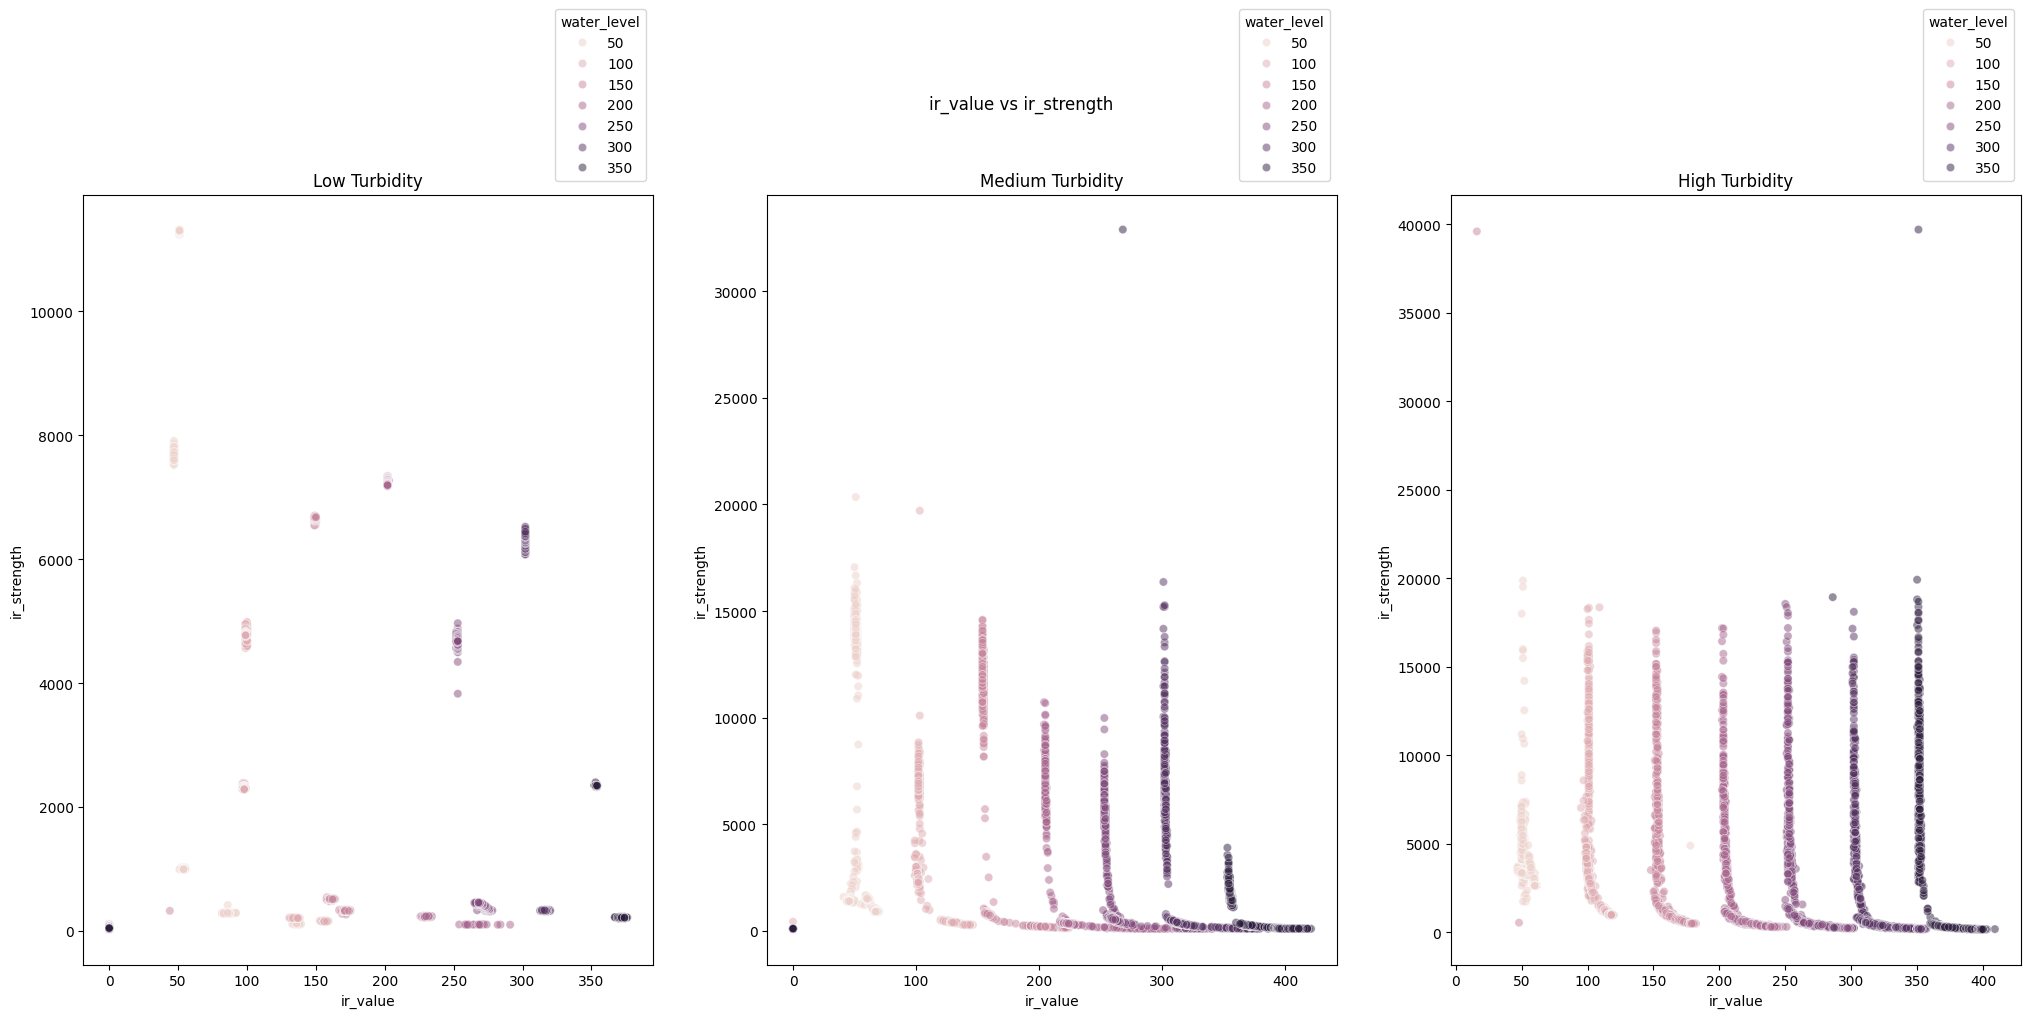

In [11]:
fig, axes = plt.subplots(ncols = 3, figsize = (25, 10))

fig.suptitle('ir_value vs ir_strength')

sns.scatterplot(data = df_low_turb, x = 'ir_value', y = 'ir_strength', alpha = 0.5, hue = 'water_level', ax = axes[0])
axes[0].set_title('Low Turbidity')
axes[0].legend(title = 'water_level', bbox_to_anchor = (1, 1.25))

sns.scatterplot(data = df_med_turb, x = 'ir_value', y = 'ir_strength', alpha = 0.5, hue = 'water_level', ax = axes[1])
axes[1].set_title('Medium Turbidity')
axes[1].legend(title = 'water_level', bbox_to_anchor = (1, 1.25))

sns.scatterplot(data = df_high_turb, x = 'ir_value', y = 'ir_strength', alpha = 0.5, hue = 'water_level', ax = axes[2])
axes[2].set_title('High Turbidity')
axes[2].legend(title = 'water_level', bbox_to_anchor = (1, 1.25))
;

Do the same as above with the us_value instead of the water_level:

''

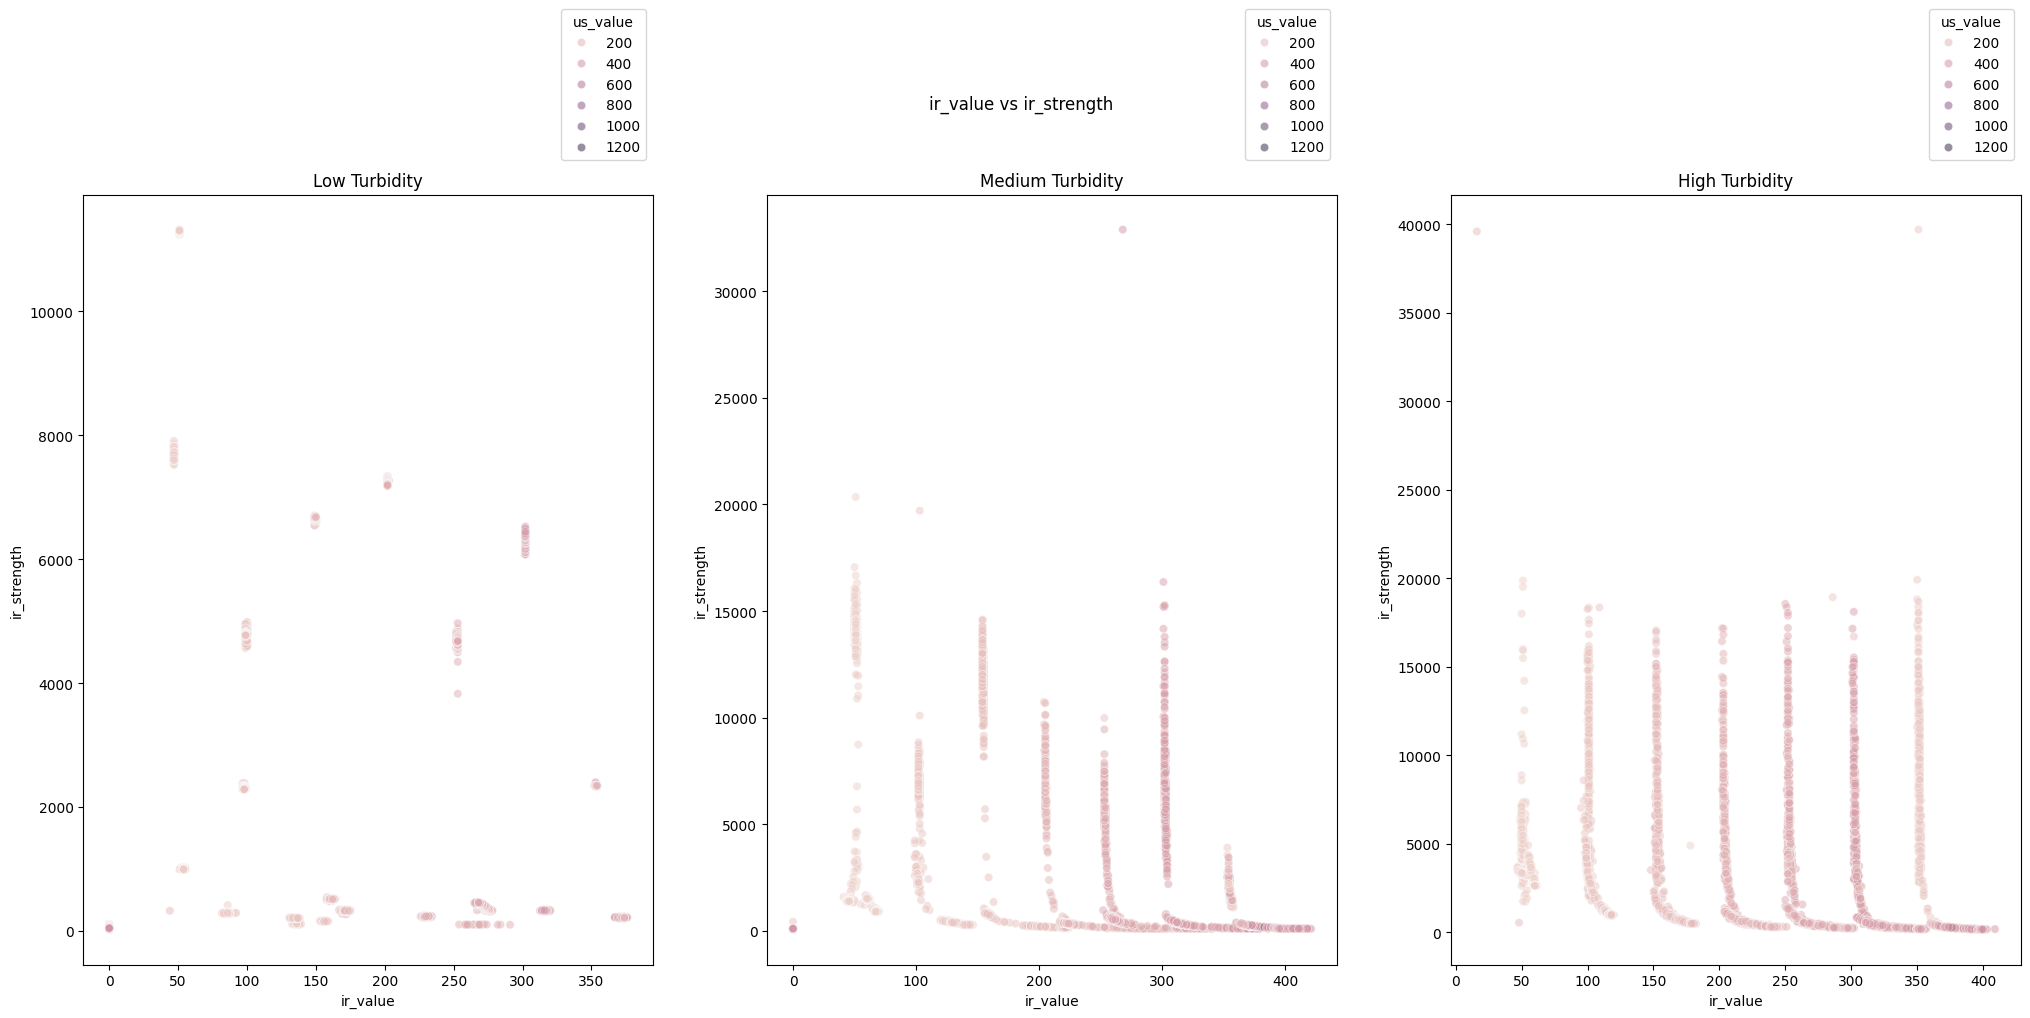

In [12]:
fig, axes = plt.subplots(ncols = 3, figsize = (25, 10))

fig.suptitle('ir_value vs ir_strength')

sns.scatterplot(data = df_low_turb, x = 'ir_value', y = 'ir_strength', alpha = 0.5, hue = 'us_value', ax = axes[0])
axes[0].set_title('Low Turbidity')
axes[0].legend(title = 'us_value', bbox_to_anchor = (1, 1.25))

sns.scatterplot(data = df_med_turb, x = 'ir_value', y = 'ir_strength', alpha = 0.5, hue = 'us_value', ax = axes[1])
axes[1].set_title('Medium Turbidity')
axes[1].legend(title = 'us_value', bbox_to_anchor = (1, 1.25))

sns.scatterplot(data = df_high_turb, x = 'ir_value', y = 'ir_strength', alpha = 0.5, hue = 'us_value', ax = axes[2])
axes[2].set_title('High Turbidity')
axes[2].legend(title = 'us_value', bbox_to_anchor = (1, 1.25))
;

Compare us_value with water_level:

''

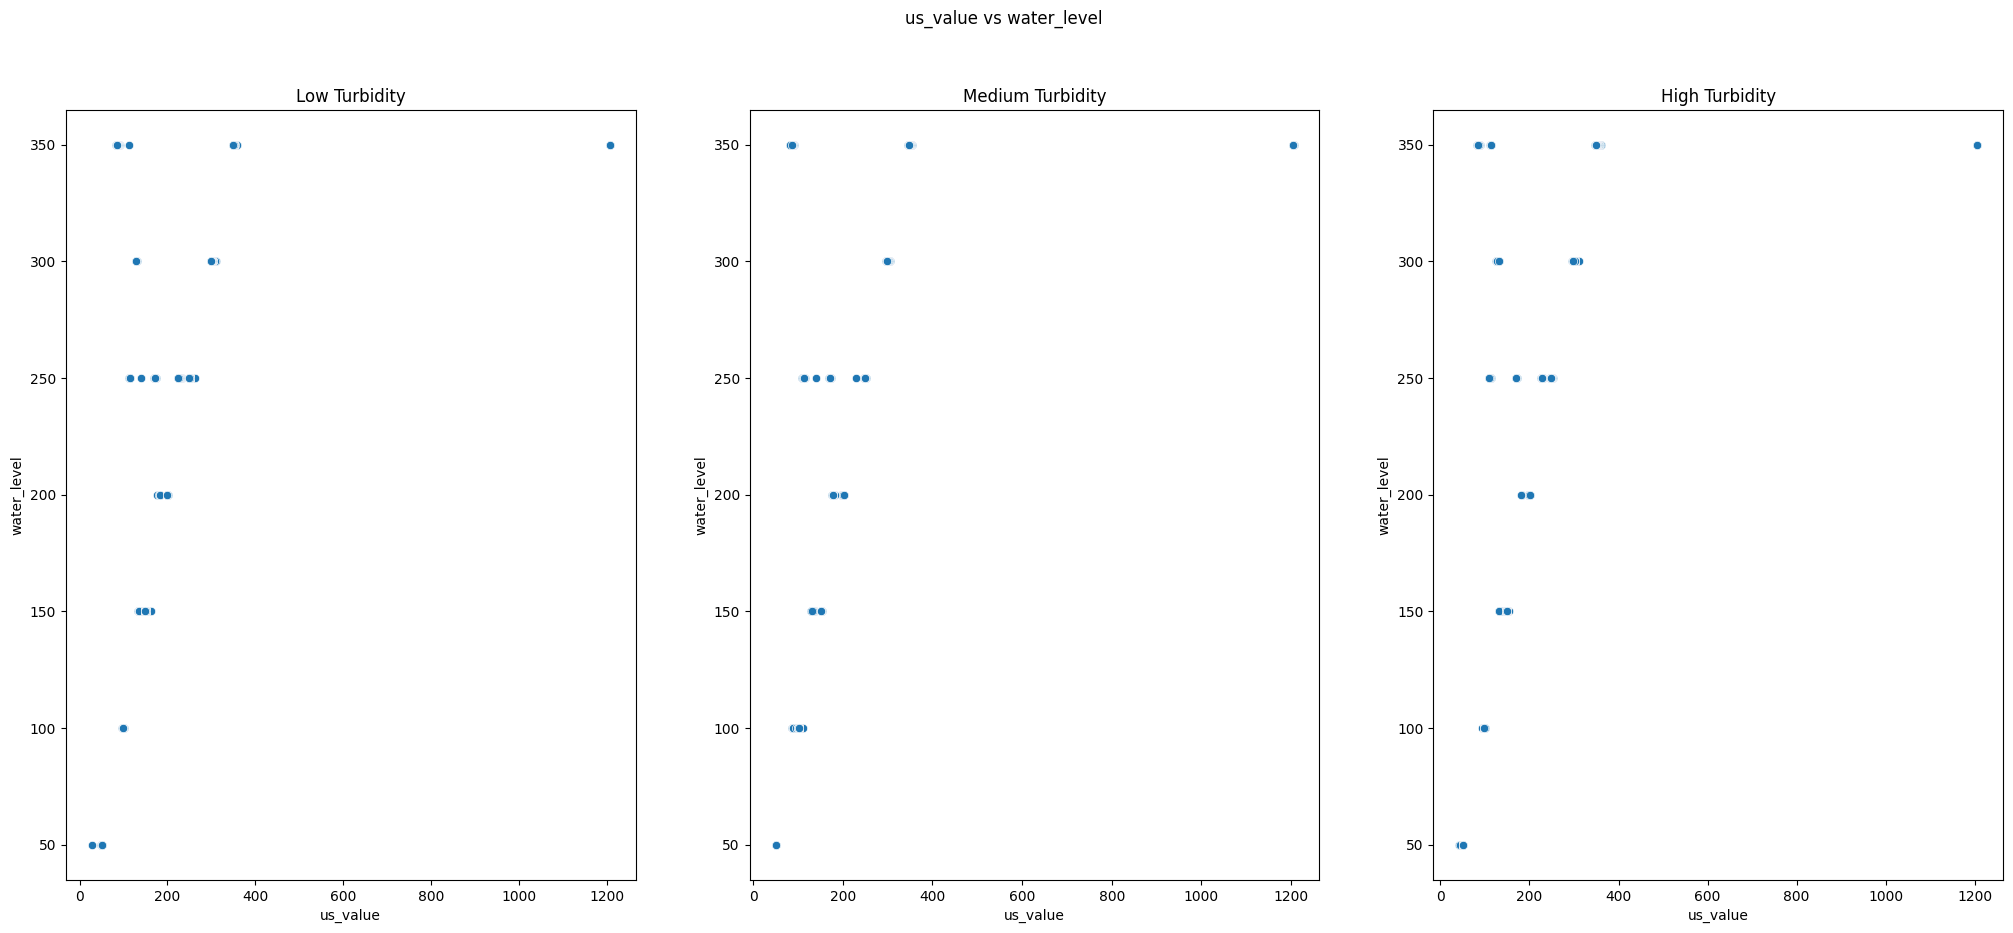

In [13]:
fig, axes = plt.subplots(ncols = 3, figsize = (25, 10))

fig.suptitle('us_value vs water_level')

sns.scatterplot(data = df_low_turb, x = 'us_value', y = 'water_level', ax = axes[0])
axes[0].set_title('Low Turbidity')

sns.scatterplot(data = df_med_turb, x = 'us_value', y = 'water_level', ax = axes[1])
axes[1].set_title('Medium Turbidity')

sns.scatterplot(data = df_high_turb, x = 'us_value', y = 'water_level', ax = axes[2])
axes[2].set_title('High Turbidity')
;

Compare Accelerometer Values With Water Level:

''

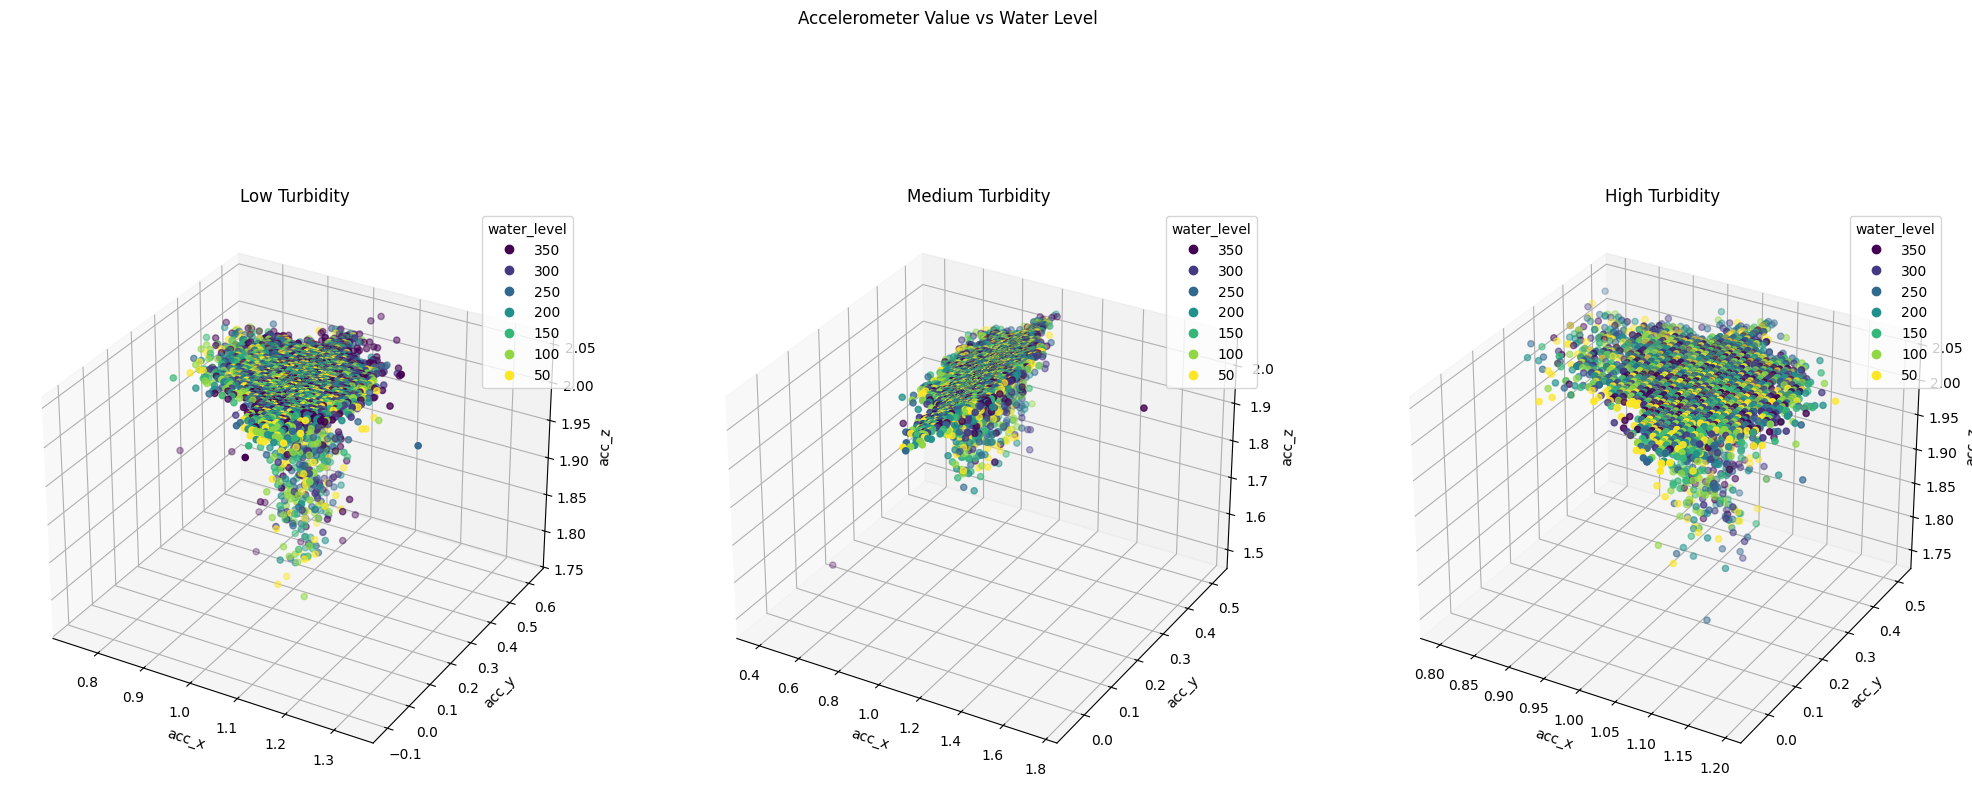

In [14]:
fig, axes = plt.subplots(ncols = 3, figsize = (25, 10), subplot_kw = {'projection': '3d'})

fig.suptitle('Accelerometer Value vs Water Level')
water_levels = [350, 300, 250, 200, 150, 100, 50]

scatter_0 = axes[0].scatter(df_low_turb['acc_x'], df_low_turb['acc_y'], df_low_turb['acc_z'], c = df_low_turb['water_level']);
axes[0].set_title('Low Turbidity')
axes[0].legend(handles=scatter_0.legend_elements()[0], labels = water_levels, title = 'water_level')

scatter_1 = axes[1].scatter(df_med_turb['acc_x'], df_med_turb['acc_y'], df_med_turb['acc_z'], c = df_med_turb['water_level']);
axes[1].set_title('Medium Turbidity')
axes[1].legend(handles=scatter_1.legend_elements()[0], labels = water_levels, title = 'water_level')

scatter_2 = axes[2].scatter(df_high_turb['acc_x'], df_high_turb['acc_y'], df_high_turb['acc_z'], c = df_high_turb['water_level'])
axes[2].set_title('High Turbidity')
axes[2].legend(handles=scatter_2.legend_elements()[0], labels = water_levels, title = 'water_level')

for ax in range(0, axes.shape[0]):
    axes[ax].set_xlabel('acc_x')
    axes[ax].set_ylabel('acc_y')
    axes[ax].set_zlabel('acc_z')
;

Compare Gyroscope Values With Water Level:

''

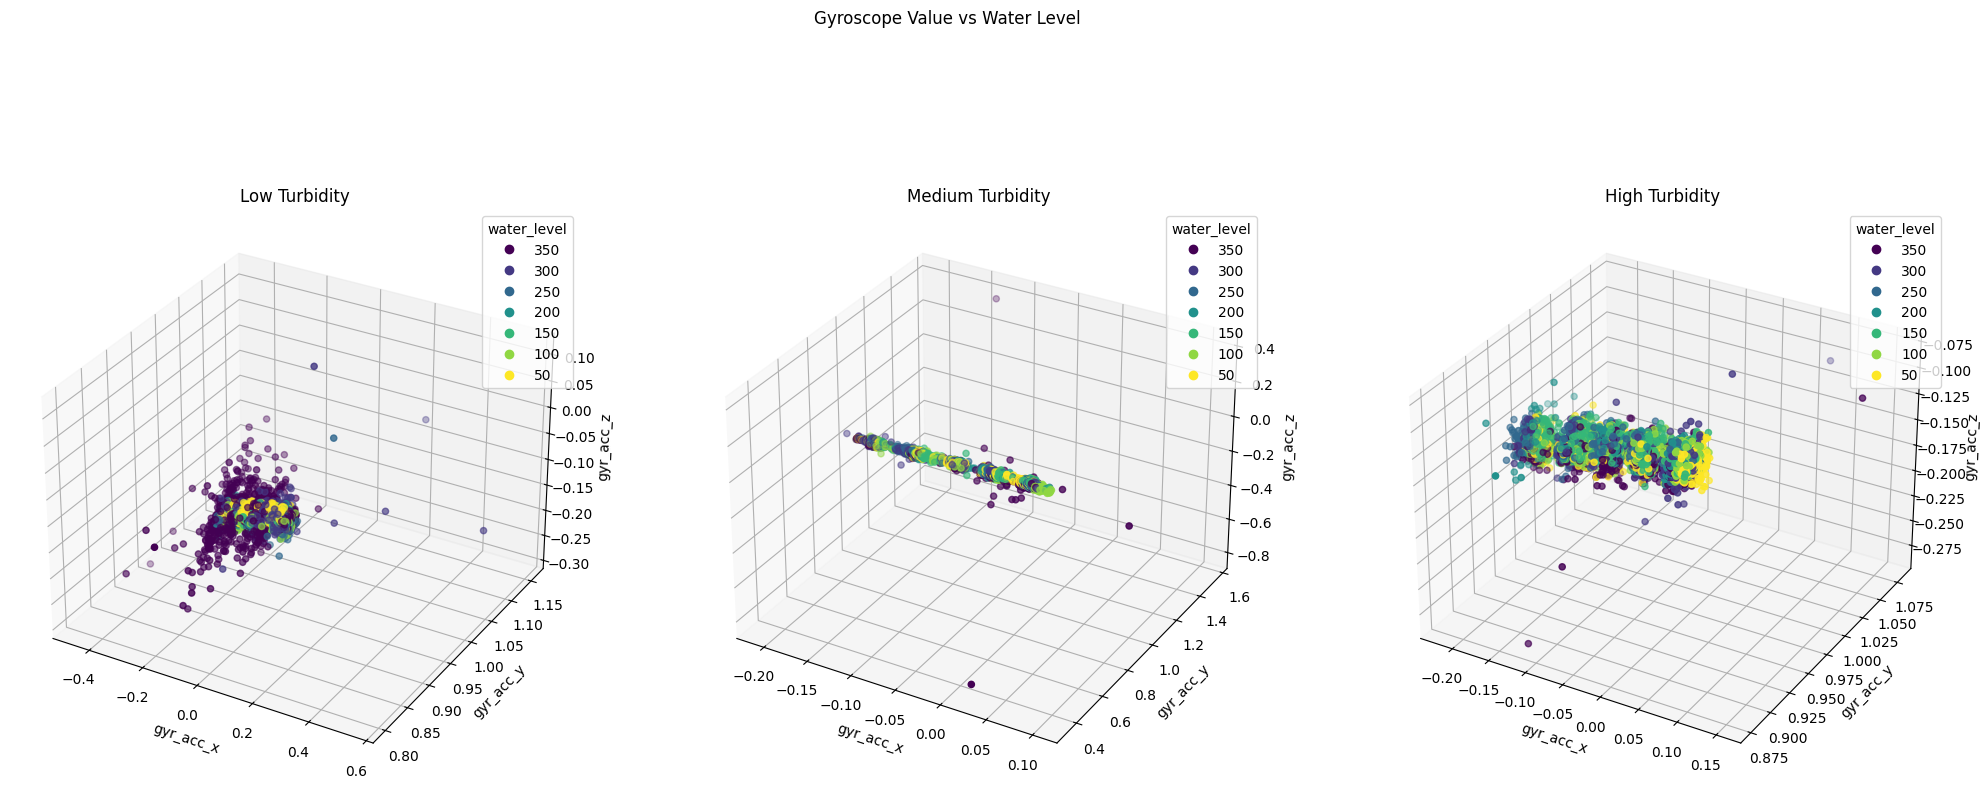

In [15]:
fig, axes = plt.subplots(ncols = 3, figsize = (25, 10), subplot_kw = {'projection': '3d'})

fig.suptitle('Gyroscope Value vs Water Level')
water_levels = [350, 300, 250, 200, 150, 100, 50]

scatter_0 = axes[0].scatter(df_low_turb['gyr_acc_x'], df_low_turb['gyr_acc_y'], df_low_turb['gyr_acc_z'], c = df_low_turb['water_level']);
axes[0].set_title('Low Turbidity')
axes[0].legend(handles=scatter_0.legend_elements()[0], labels = water_levels, title = 'water_level')

scatter_1 = axes[1].scatter(df_med_turb['gyr_acc_x'], df_med_turb['gyr_acc_y'], df_med_turb['gyr_acc_z'], c = df_med_turb['water_level']);
axes[1].set_title('Medium Turbidity')
axes[1].legend(handles=scatter_1.legend_elements()[0], labels = water_levels, title = 'water_level')

scatter_2 = axes[2].scatter(df_high_turb['gyr_acc_x'], df_high_turb['gyr_acc_y'], df_high_turb['gyr_acc_z'], c = df_high_turb['water_level'])
axes[2].set_title('High Turbidity')
axes[2].legend(handles=scatter_2.legend_elements()[0], labels = water_levels, title = 'water_level')

for ax in range(0, axes.shape[0]):
    axes[ax].set_xlabel('gyr_acc_x')
    axes[ax].set_ylabel('gyr_acc_y')
    axes[ax].set_zlabel('gyr_acc_z')
;

Visualize Feature/Label Correlation With Heatmaps:

''

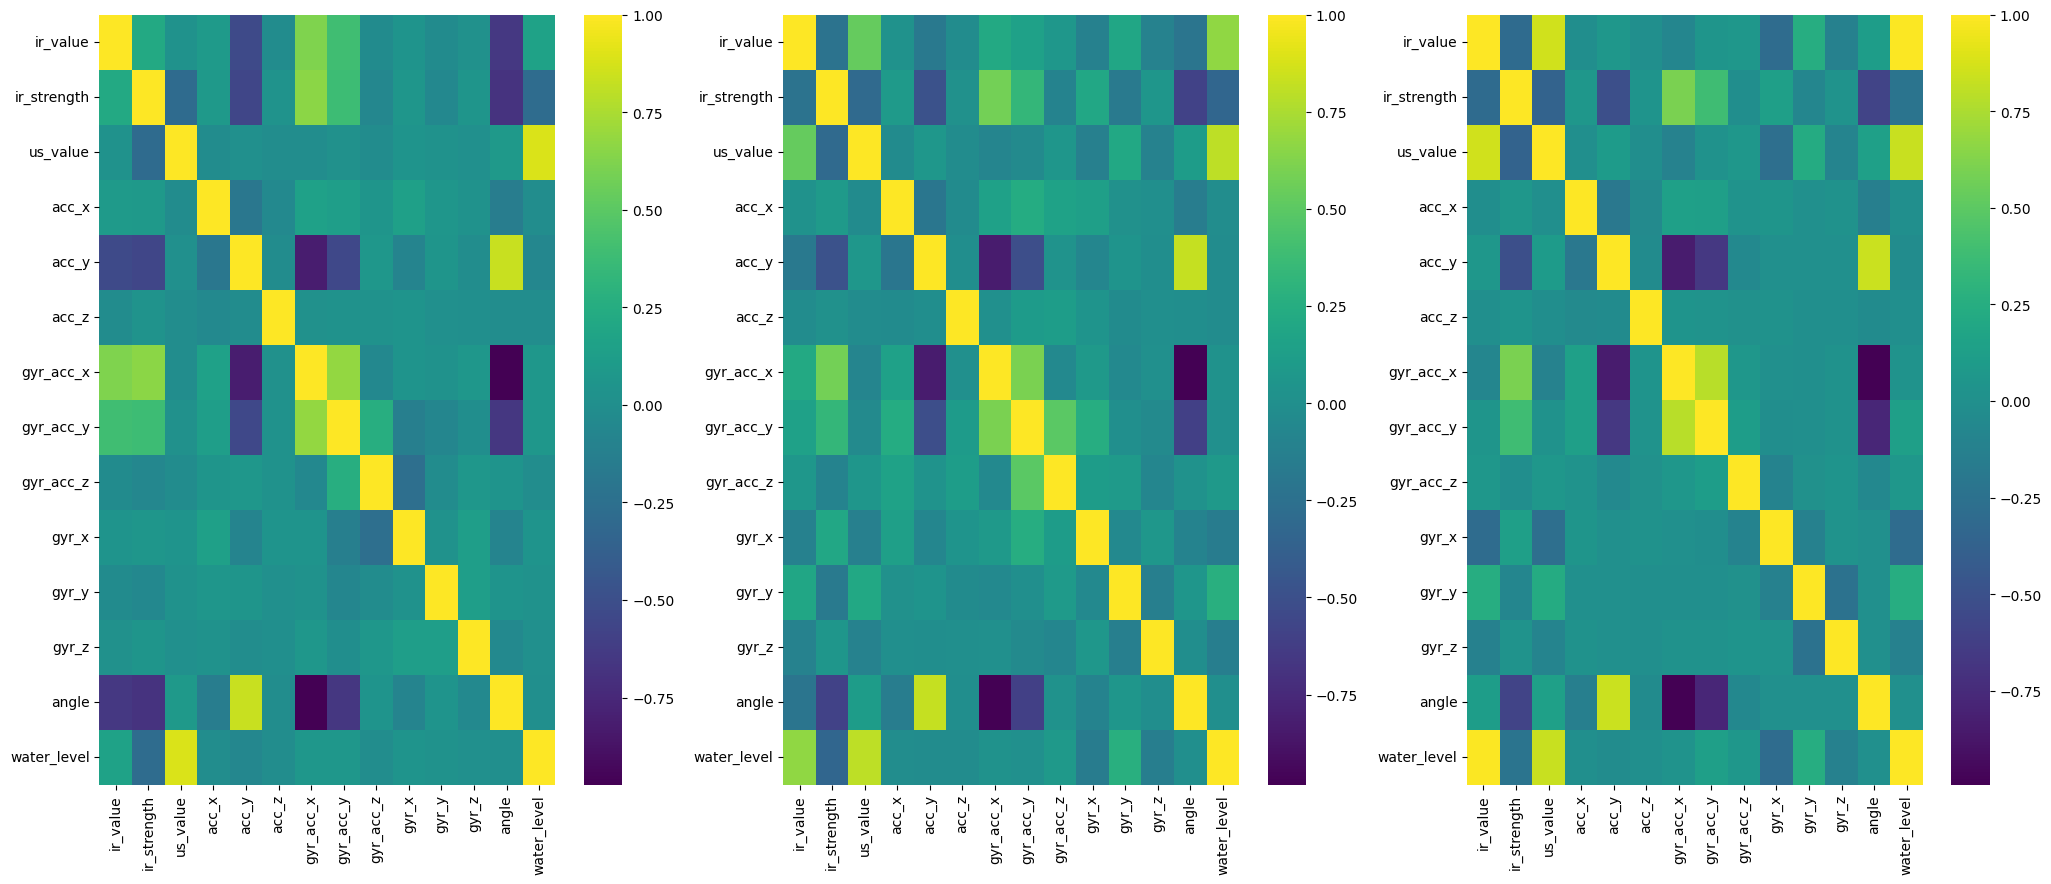

In [16]:
fig, axes = plt.subplots(ncols = 3, figsize = (25, 10))

#fig.suptitle('')

sns.heatmap(df_low_turb.corr(), ax = axes[0], cmap = 'viridis')
sns.heatmap(df_med_turb.corr(), ax = axes[1], cmap = 'viridis')
sns.heatmap(df_high_turb.corr(), ax = axes[2], cmap = 'viridis')
;

# Combined Dataset Analysis:

Ordinally Encode Turbidity Into Each Dataframe:

In [5]:
df_low_turb_temp = df_low_turb.copy()
df_low_turb_temp['turbidity'] = 0
df_low_turb_temp.head()

ir_value  ir_strength  us_value  acc_x  acc_y  acc_z  gyr_acc_x  gyr_acc_y  \
0      51.0      11255.0   49.5743  1.048  0.144  2.044  -0.000488   0.971191   
1      51.0      11245.0   49.5661  1.048  0.160  2.044   0.008545   0.961426   
2      51.0      11237.0   49.5702  1.064  0.128  2.044   0.009766   0.963379   
3      51.0      11253.0   49.5375  1.056  0.112  2.044   0.006348   0.963623   
4      51.0      11253.0   49.5702  1.144  0.112  2.044   0.008057   0.966797   

   gyr_acc_z     gyr_x     gyr_y     gyr_z  angle  water_level  turbidity  
0  -0.144531 -0.473282  0.458015 -0.259542    0.0         50.0          0  
1  -0.142334 -0.458015  0.480916 -0.274809    0.0         50.0          0  
2  -0.151855 -0.442748  0.473282 -0.274809    0.0         50.0          0  
3  -0.142334 -0.465649  0.473282 -0.259542    0.0         50.0          0  
4  -0.153320 -0.480916  0.488550 -0.259542    0.0         50.0          0

In [6]:
df_med_turb_temp = df_med_turb.copy()
df_med_turb_temp['turbidity'] = 1
df_med_turb_temp.head()

ir_value  ir_strength  us_value  acc_x  acc_y  acc_z  gyr_acc_x  gyr_acc_y  \
0      52.0      14375.0   50.5809  0.944  0.200  2.044  -0.014404   0.961914   
1      52.0      13429.0   50.5850  1.040  0.152  2.044  -0.012207   0.971680   
2      52.0      13482.0   50.6464  1.048  0.144  2.044  -0.012207   0.960693   
3      52.0      13411.0   50.5850  1.024  0.176  2.016  -0.016357   0.970703   
4      52.0      12985.0   50.5850  1.024  0.168  2.044  -0.010010   0.970459   

   gyr_acc_z     gyr_x     gyr_y     gyr_z  angle  water_level  turbidity  
0  -0.157959 -0.435115  0.488550 -0.251908    0.0         50.0          1  
1  -0.149658 -0.427481  0.496183 -0.236641    0.0         50.0          1  
2  -0.158447 -0.458015  0.480916 -0.251908    0.0         50.0          1  
3  -0.144043 -0.435115  0.473282 -0.267176    0.0         50.0          1  
4  -0.170898 -0.435115  0.488550 -0.259542    0.0         50.0          1

In [7]:
df_high_turb_temp = df_high_turb.copy()
df_high_turb_temp['turbidity'] = 2
df_high_turb_temp.head()

ir_value  ir_strength  us_value  acc_x  acc_y  acc_z  gyr_acc_x  gyr_acc_y  \
0      51.0       4839.0   49.8730  1.024  0.152  2.044  -0.003662   0.970947   
1      52.0       5256.0   49.8648  1.024  0.168  2.044  -0.011230   0.964355   
2      51.0       4371.0   49.8689  1.032  0.160  2.044  -0.007080   0.974609   
3      51.0       4734.0   49.8812  1.104  0.152  2.044  -0.010498   0.962402   
4      51.0       3553.0   50.2945  1.144  0.152  2.044  -0.007080   0.958740   

   gyr_acc_z     gyr_x     gyr_y     gyr_z  angle  water_level  turbidity  
0  -0.145264 -0.465649  0.503817 -0.267176    0.0         50.0          2  
1  -0.143799 -0.450382  0.488550 -0.267176    0.0         50.0          2  
2  -0.140869 -0.473282  0.503817 -0.267176    0.0         50.0          2  
3  -0.171387 -0.458015  0.511450 -0.267176    0.0         50.0          2  
4  -0.148926 -0.442748  0.488550 -0.267176    0.0         50.0          2

Create Combined Dataframe:

In [8]:
df_all_turb = pd.concat([df_low_turb_temp, df_med_turb_temp, df_high_turb_temp], axis = 0)
df_all_turb.head()

ir_value  ir_strength  us_value  acc_x  acc_y  acc_z  gyr_acc_x  gyr_acc_y  \
0      51.0      11255.0   49.5743  1.048  0.144  2.044  -0.000488   0.971191   
1      51.0      11245.0   49.5661  1.048  0.160  2.044   0.008545   0.961426   
2      51.0      11237.0   49.5702  1.064  0.128  2.044   0.009766   0.963379   
3      51.0      11253.0   49.5375  1.056  0.112  2.044   0.006348   0.963623   
4      51.0      11253.0   49.5702  1.144  0.112  2.044   0.008057   0.966797   

   gyr_acc_z     gyr_x     gyr_y     gyr_z  angle  water_level  turbidity  
0  -0.144531 -0.473282  0.458015 -0.259542    0.0         50.0          0  
1  -0.142334 -0.458015  0.480916 -0.274809    0.0         50.0          0  
2  -0.151855 -0.442748  0.473282 -0.274809    0.0         50.0          0  
3  -0.142334 -0.465649  0.473282 -0.259542    0.0         50.0          0  
4  -0.153320 -0.480916  0.488550 -0.259542    0.0         50.0          0

Get basic info and stats about the full data set:

In [21]:
df_all_turb.info() #Check the full dataset for any null values

<class 'pandas.core.frame.DataFrame'>
Index: 31500 entries, 0 to 10499
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ir_value     31500 non-null  float64
 1   ir_strength  31500 non-null  float64
 2   us_value     31500 non-null  float64
 3   acc_x        31500 non-null  float64
 4   acc_y        31500 non-null  float64
 5   acc_z        31500 non-null  float64
 6   gyr_acc_x    31500 non-null  float64
 7   gyr_acc_y    31500 non-null  float64
 8   gyr_acc_z    31500 non-null  float64
 9   gyr_x        31500 non-null  float64
 10  gyr_y        31500 non-null  float64
 11  gyr_z        31500 non-null  float64
 12  angle        31500 non-null  float64
 13  water_level  31500 non-null  float64
 14  turbidity    31500 non-null  int64  
dtypes: float64(14), int64(1)
memory usage: 3.8 MB


In [22]:
df_all_turb.describe() #Get stats about the columns in the full dataset

ir_value   ir_strength      us_value         acc_x         acc_y  \
count  31500.000000  31500.000000  31500.000000  31500.000000  31500.000000   
mean     173.954984   2030.736349    191.260996      1.031480      0.257624   
std      128.995280   3330.492298    108.989943      0.043858      0.085877   
min        0.000000     22.000000     27.526700      0.384000     -0.112000   
25%       52.000000    138.000000     99.349100      1.024000      0.192000   
50%      160.000000    343.000000    198.541000      1.032000      0.256000   
75%      288.000000   2359.000000    297.769000      1.048000      0.320000   
max      421.000000  39690.000000   1206.490000      1.752000      0.624000   

              acc_z     gyr_acc_x     gyr_acc_y     gyr_acc_z         gyr_x  \
count  31500.000000  31500.000000  31500.000000  31500.000000  31500.000000   
mean       2.037965     -0.090428      0.957950     -0.148966     -0.477766   
std        0.025595      0.061828      0.011712      0.010135      0.047766   
min        1.488000     -0.463623      0.342041     -0.809082     -2.687020   
25%        2.044000     -0.137939      0.951172     -0.153564     -0.496183   
50%        2.044000     -0.088623      0.959473     -0.148682     -0.480916   
75%        2.044000     -0.044434      0.965088     -0.144287     -0.465649   
max        2.044000      0.549805      1.549070      0.383545      1.076340   

              gyr_y         gyr_z        angle   water_level    turbidity  
count  31500.000000  31500.000000  31500.00000  31500.000000  31500.00000  
mean       0.494482     -0.264652      5.00000    200.000000      1.00000  
std        0.024145      0.015576      3.53559    100.001587      0.81651  
min       -1.290080     -0.648855      0.00000     50.000000      0.00000  
25%        0.480916     -0.274809      2.50000    100.000000      0.00000  
50%        0.496183     -0.267176      5.00000    200.000000      1.00000  
75%        0.503817     -0.259542      7.50000    300.000000      2.00000  
max        1.801530      0.419847     10.00000    350.000000      2.00000

Compare the ir_values and the ir_strengths with each other and the water_level label:

''

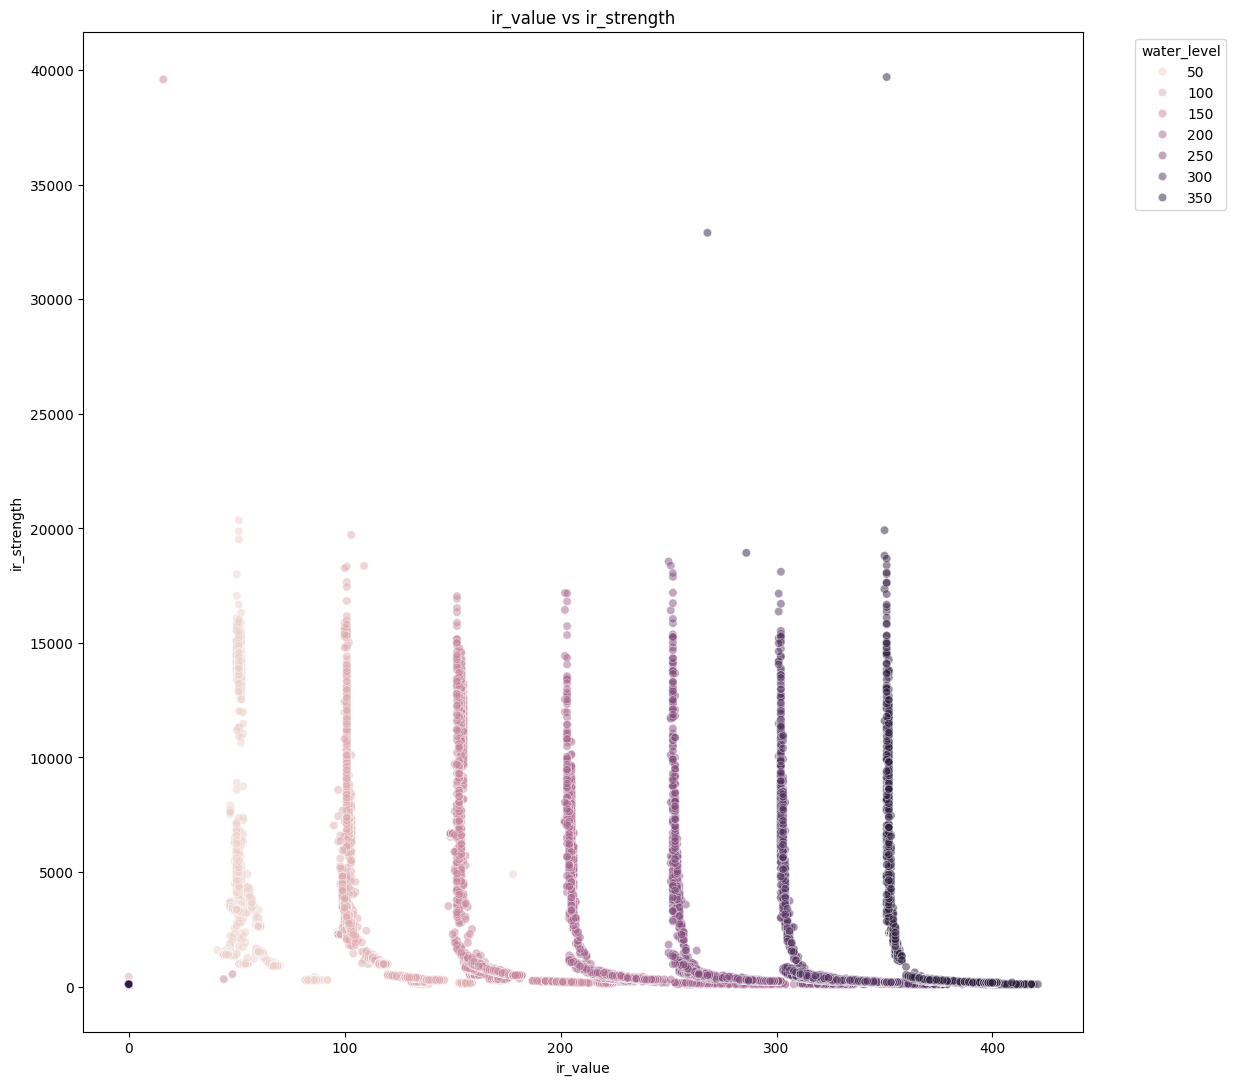

In [23]:
fig = plt.figure(figsize = (10, 10))
ax = fig.add_axes([0, 0, 1, 1])

sns.scatterplot(data = df_all_turb, x = 'ir_value', y = 'ir_strength', alpha = 0.5, hue = 'water_level')
ax.legend(title = 'water_level', bbox_to_anchor = (1.15, 1))

ax.set_title('ir_value vs ir_strength')
;

Do the same as above with the us_value instead of the water_level:

''

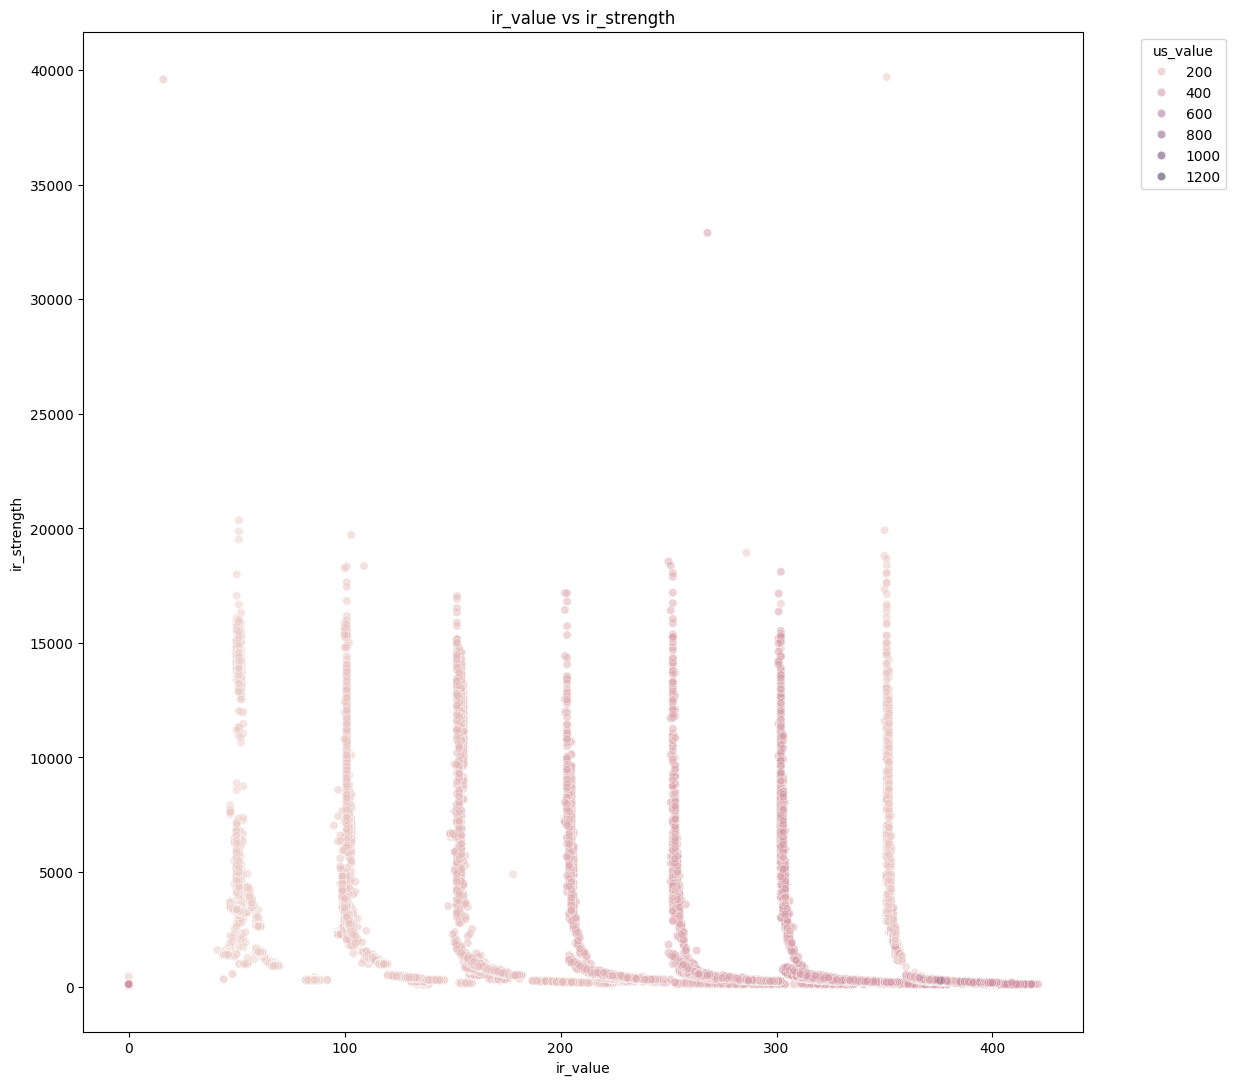

In [24]:
fig = plt.figure(figsize = (10, 10))
ax = fig.add_axes([0, 0, 1, 1])

sns.scatterplot(data = df_all_turb, x = 'ir_value', y = 'ir_strength', alpha = 0.5, hue = 'us_value')
ax.legend(title = 'us_value', bbox_to_anchor = (1.15, 1))

ax.set_title('ir_value vs ir_strength')
;

Compare us_value with water_level:

''

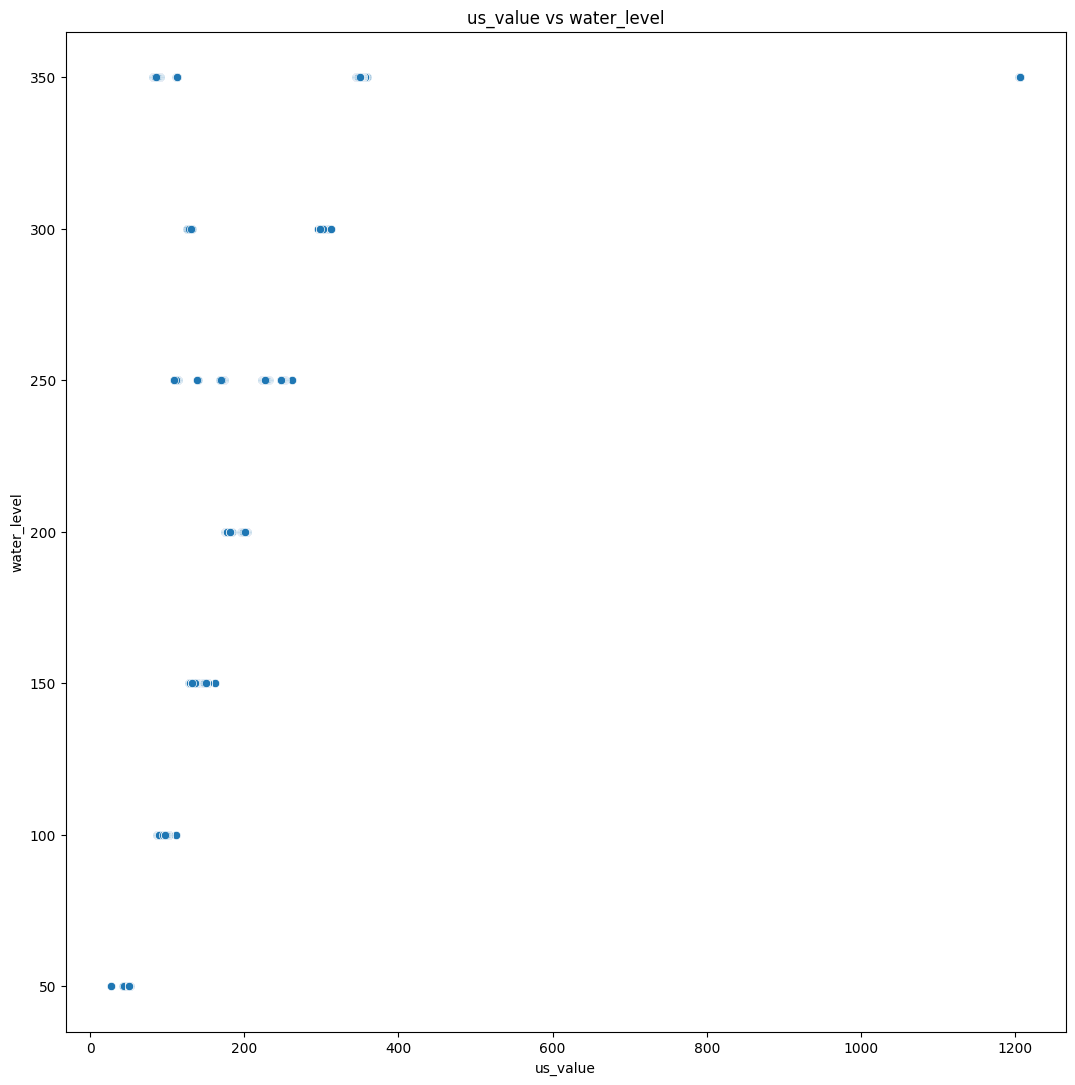

In [25]:
fig = plt.figure(figsize = (10, 10))
ax = fig.add_axes([0, 0, 1, 1])

sns.scatterplot(data = df_all_turb, x = 'us_value', y = 'water_level')

ax.set_title('us_value vs water_level')
;

Compare Accelerometer Values With Water Level:

In [26]:
from mpl_toolkits.mplot3d.axes3d import Axes3D

''

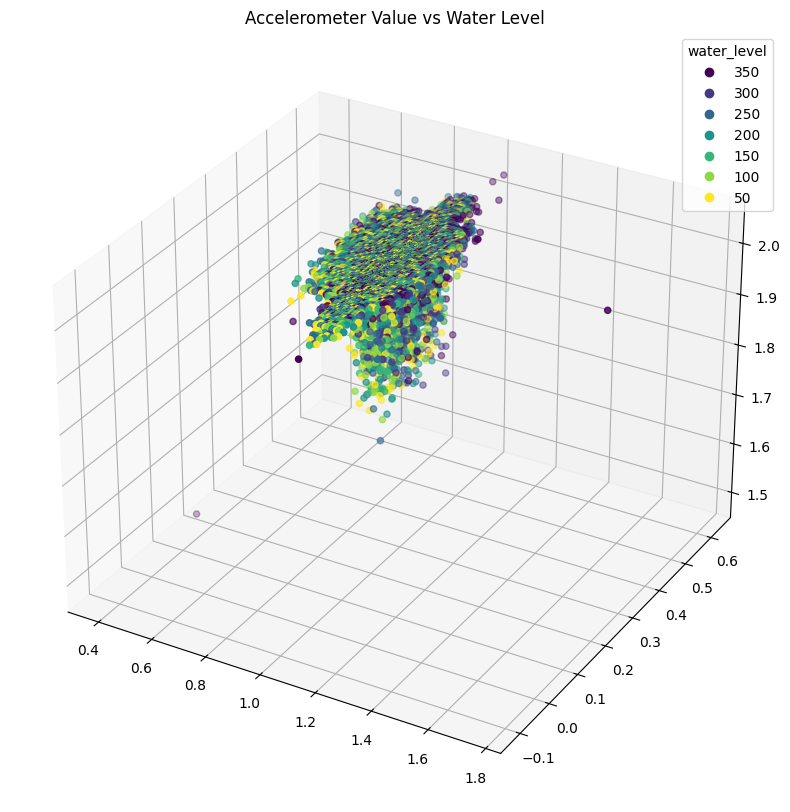

In [27]:
fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(1, 1, 1, projection = '3d')

water_levels = [350, 300, 250, 200, 150, 100, 50]

scatter = ax.scatter(df_all_turb['acc_x'], df_all_turb['acc_y'], df_all_turb['acc_z'], c = df_all_turb['water_level'])
ax.legend(handles=scatter_0.legend_elements()[0], labels = water_levels, title = 'water_level')

ax.set_title('Accelerometer Value vs Water Level')
;

Compare Gyroscope Values With Water Level:

''

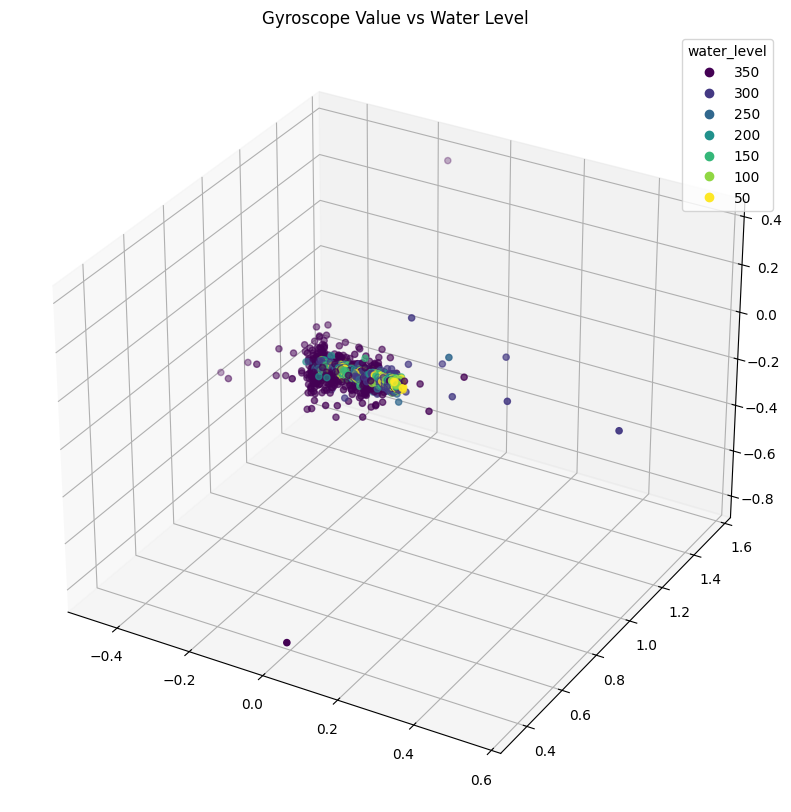

In [28]:
fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(1, 1, 1, projection = '3d')

water_levels = [350, 300, 250, 200, 150, 100, 50]

scatter = ax.scatter(df_all_turb['gyr_acc_x'], df_all_turb['gyr_acc_y'], df_all_turb['gyr_acc_z'], c = df_all_turb['water_level'])
ax.legend(handles=scatter_0.legend_elements()[0], labels = water_levels, title = 'water_level')

ax.set_title('Gyroscope Value vs Water Level')
;

Visualize Feature/Label Correlation With A Heatmap:

''

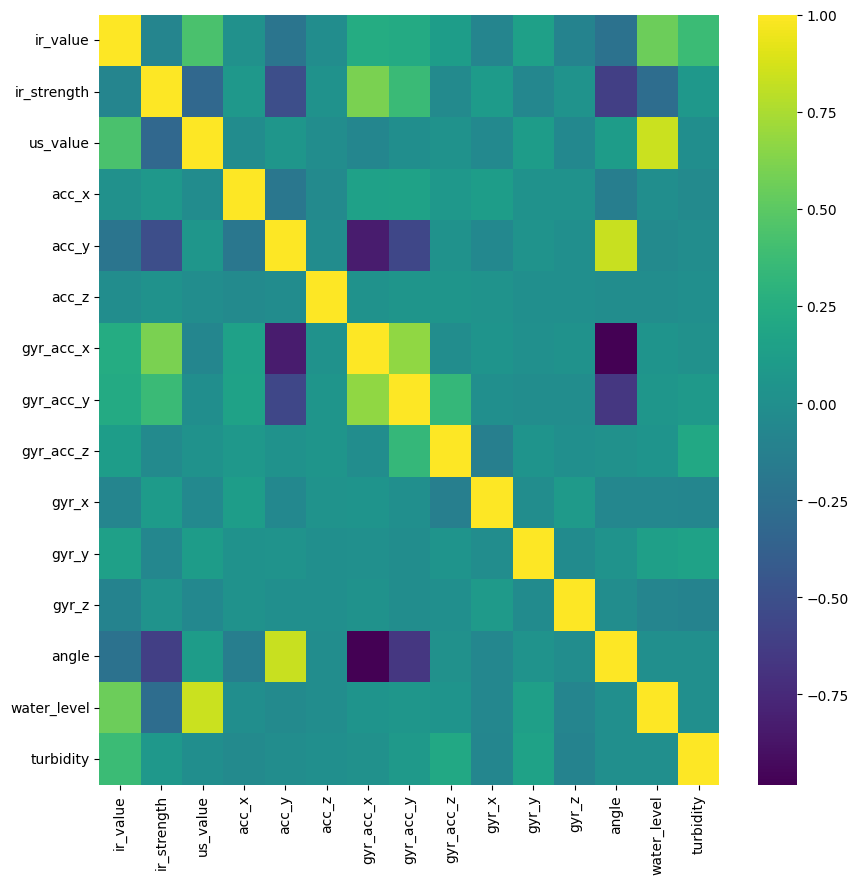

In [29]:
fig = plt.figure(figsize = (10, 10))

sns.heatmap(df_all_turb.corr(), cmap = 'viridis')
;

# Data Preparation:

Split Combined Dataset Into Features And Labels (X and y):

In [9]:
X = df_all_turb.drop('water_level', axis = 1)
X

ir_value  ir_strength  us_value  acc_x  acc_y  acc_z  gyr_acc_x  \
0          51.0      11255.0   49.5743  1.048  0.144  2.044  -0.000488   
1          51.0      11245.0   49.5661  1.048  0.160  2.044   0.008545   
2          51.0      11237.0   49.5702  1.064  0.128  2.044   0.009766   
3          51.0      11253.0   49.5375  1.056  0.112  2.044   0.006348   
4          51.0      11253.0   49.5702  1.144  0.112  2.044   0.008057   
...         ...          ...       ...    ...    ...    ...        ...   
10495     398.0        177.0  348.1290  0.888  0.408  2.044  -0.156982   
10496     400.0        178.0  349.8930  1.032  0.384  2.044  -0.176025   
10497     399.0        168.0  349.8640  1.072  0.376  2.044  -0.172119   
10498     399.0        169.0  349.4430  0.992  0.256  2.044  -0.174316   
10499     400.0        167.0  349.8680  1.040  0.320  2.044  -0.175049   

       gyr_acc_y  gyr_acc_z     gyr_x     gyr_y     gyr_z  angle  turbidity  
0       0.971191  -0.144531 -0.473282  0.458015 -0.259542    0.0          0  
1       0.961426  -0.142334 -0.458015  0.480916 -0.274809    0.0          0  
2       0.963379  -0.151855 -0.442748  0.473282 -0.274809    0.0          0  
3       0.963623  -0.142334 -0.465649  0.473282 -0.259542    0.0          0  
4       0.966797  -0.153320 -0.480916  0.488550 -0.259542    0.0          0  
...          ...        ...       ...       ...       ...    ...        ...  
10495   0.965332  -0.155273 -0.473282  0.458015 -0.267176   10.0          2  
10496   0.952637  -0.169678 -0.480916  0.526718 -0.290076   10.0          2  
10497   0.947998  -0.152344 -0.480916  0.557252 -0.274809   10.0          2  
10498   0.941406  -0.152832 -0.496183  0.511450 -0.267176   10.0          2  
10499   0.951172  -0.146729 -0.465649  0.519084 -0.290076   10.0          2  

[31500 rows x 14 columns]

In [10]:
y = df_all_turb['water_level']
y

0         50.0
1         50.0
2         50.0
3         50.0
4         50.0
         ...  
10495    350.0
10496    350.0
10497    350.0
10498    350.0
10499    350.0
Name: water_level, Length: 31500, dtype: float64

Split X and y Into Training And Testing Sets With A 20% Test Set Size (Validation Sets Automatically Generated By Grid Searches):

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

Scale Data For Models That Require Scaled Data:

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
scaler = StandardScaler()
scaler.fit(X_train)
scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

# Score Tracker Creation:

In [15]:
score_tracker = pd.DataFrame(columns = ['Model', 'MAE', 'MSE', 'RMSE', 'Avg Residual'])
score_tracker

Empty DataFrame
Columns: [Model, MAE, MSE, RMSE, Avg Residual]
Index: []

# Polynomial Regression Model:

In [16]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [38]:
operations = [('poly', PolynomialFeatures(include_bias = False)), ('model', ElasticNet(max_iter = 10000))]
pipe = Pipeline(operations)

In [39]:
poly_param_grid = {'poly__degree': [1, 2], 'model__alpha': [0.1, 1, 5, 10, 50, 100], 'model__l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.95, 0.99]}

In [2]:
poly_model = GridSearchCV(estimator = pipe, param_grid = poly_param_grid, scoring = 'neg_mean_squared_error', cv = 5, n_jobs = -1, verbose = 2)
poly_model.fit(scaled_X_train, y_train) #Note: This takes a very long time, so only run this once and record the best fitting model for later use

Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('poly',
                                        PolynomialFeatures(include_bias=False)),
                                       ('model', ElasticNet(max_iter=10000))]),
             n_jobs=-1,
             param_grid={'model__alpha': [0.1, 1, 5, 10, 50, 100],
                         'model__l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.95, 0.99],
                         'poly__degree': [1, 2]},
             scoring='neg_mean_squared_error', verbose=2)

In [3]:
poly_model.best_params_

{'model__alpha': 0.1, 'model__l1_ratio': 0.99, 'poly__degree': 2}

# Save Polynomial Model:

In [17]:
from joblib import dump, load

In [ ]:
dump(poly_model, 'poly_model.joblib') #To prevent having to fit again

['poly_model.joblib']

In [18]:
poly_model = load('poly_model.joblib')

# Polynomial Model Evaluation:

Make Predictions:

In [19]:
y_pred = poly_model.predict(scaled_X_test)

Check Residuals:

Text(0, 0.5, 'residual')

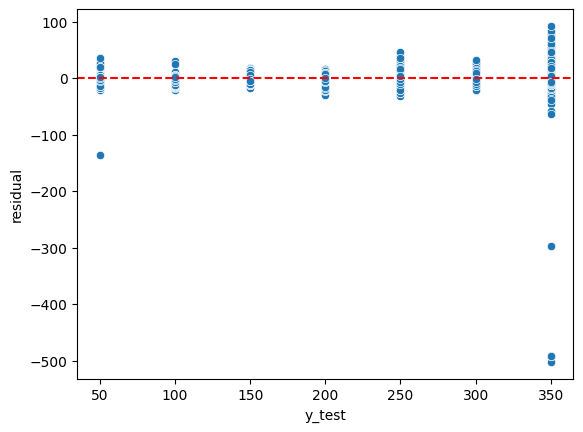

In [20]:
residuals = y_test - y_pred
sns.scatterplot(x = y_test, y = residuals)
plt.axhline(y = 0, color = 'r', ls = '--')
plt.xlabel('y_test')
plt.ylabel('residual')
#There are only 4 major residuals, and the rest appear to evenly surround the target line

Log Error And Average Residual To Score Tracker:

In [21]:
score_tracker.loc[0] = ['Polynomial', mean_absolute_error(y_test, y_pred), mean_squared_error(y_test, y_pred), np.sqrt(mean_squared_error(y_test, y_pred)), np.average(residuals)]
score_tracker

Model       MAE         MSE       RMSE  Avg Residual
0  Polynomial  7.167545  233.086205  15.267161     -0.069596

# K-Nearest Neighbors Model:

In [22]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
np.sqrt(31500)

np.float64(177.48239349298848)

In [47]:
knn_param_grid = {'n_neighbors': [5, 10, 25, 50, 75, 100, 125, 150, 175, 200, 225, 250, 275, 300], 'p': [1, 2], 'weights': ['uniform', 'distance']}

In [49]:
knn_model = GridSearchCV(estimator = KNeighborsRegressor(), param_grid = knn_param_grid, scoring = 'neg_mean_squared_error', cv = 5, n_jobs = -1, verbose = 2)
knn_model.fit(scaled_X_train, y_train)

Fitting 5 folds for each of 56 candidates, totalling 280 fits


GridSearchCV(cv=5, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'n_neighbors': [5, 10, 25, 50, 75, 100, 125, 150, 175,
                                         200, 225, 250, 275, 300],
                         'p': [1, 2], 'weights': ['uniform', 'distance']},
             scoring='neg_mean_squared_error', verbose=2)

In [51]:
knn_model.best_params_

{'n_neighbors': 10, 'p': 1, 'weights': 'distance'}

# Save KNN Model:

In [50]:
dump(knn_model, 'knn_model.joblib')

['knn_model.joblib']

In [23]:
knn_model = load('knn_model.joblib')

# KNN Model Evaluation:

Make Predictions:

In [24]:
y_pred = knn_model.predict(scaled_X_test)

Check Residuals:

Text(0, 0.5, 'residual')

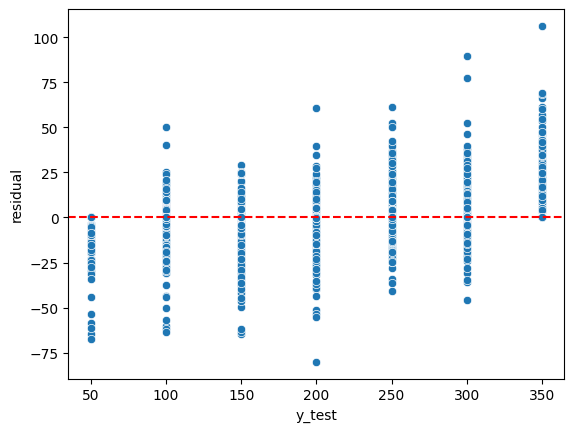

In [25]:
residuals = y_test - y_pred
sns.scatterplot(x = y_test, y = residuals)
plt.axhline(y = 0, color = 'r', ls = '--')
plt.xlabel('y_test')
plt.ylabel('residual')
#There are no extreme residuals, but they're skewed for the lowest and highest original y_test values, although they are so in opposite directions in each of these two cases

Log Error And Average Residual To Score Tracker:

In [26]:
score_tracker.loc[1] = ['KNN', mean_absolute_error(y_test, y_pred), mean_squared_error(y_test, y_pred), np.sqrt(mean_squared_error(y_test, y_pred)), np.average(residuals)]
score_tracker

Model       MAE         MSE       RMSE  Avg Residual
0  Polynomial  7.167545  233.086205  15.267161     -0.069596
1         KNN  5.146998   98.932233   9.946468     -0.089455

# Support Vector Machine Model:

In [27]:
from sklearn.svm import SVR

In [28]:
svm_param_grid = {'C': [0.001, 0.01, 0.1, 0.5, 1], 'kernel': ['linear', 'rbf', 'poly'], 'gamma': ['scale', 'auto'], 'degree': [2, 3, 4], 'epsilon': [0, 0.01, 0.1, 0.5, 1, 2]}

In [29]:
svm_model = GridSearchCV(estimator = SVR(), param_grid = svm_param_grid, scoring = 'neg_mean_squared_error', cv = 5, n_jobs = -1, verbose = 2)
svm_model.fit(scaled_X_train, y_train)

Fitting 5 folds for each of 540 candidates, totalling 2700 fits


GridSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1], 'degree': [2, 3, 4],
                         'epsilon': [0, 0.01, 0.1, 0.5, 1, 2],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']},
             scoring='neg_mean_squared_error', verbose=2)

In [32]:
svm_model.best_params_

{'C': 1, 'degree': 2, 'epsilon': 0.01, 'gamma': 'auto', 'kernel': 'rbf'}

# Save SVM Model:

In [30]:
dump(svm_model, 'svm_model.joblib')

['svm_model.joblib']

In [28]:
svm_model = load('svm_model.joblib')

# SVM Model Evaluation:

Make Predictions:

In [29]:
y_pred = svm_model.predict(scaled_X_test)

Check Residuals:

Text(0, 0.5, 'residual')

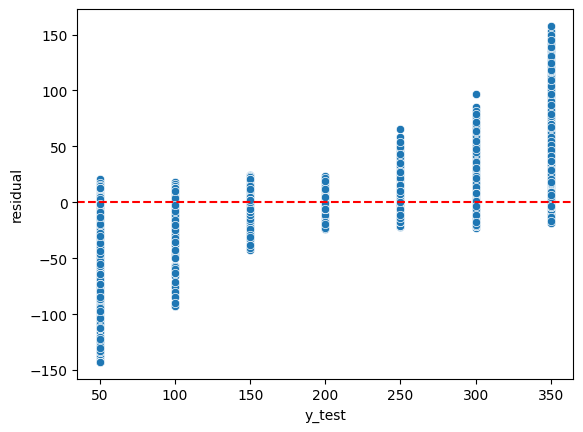

In [30]:
residuals = y_test - y_pred
sns.scatterplot(x = y_test, y = residuals)
plt.axhline(y = 0, color = 'r', ls = '--')
plt.xlabel('y_test')
plt.ylabel('residual')
#The residuals are individually skewed based on the original value, but the directions of skew appear to cancel each other out overall

Log Error And Average Residual To Score Tracker:

In [31]:
score_tracker.loc[2] = ['SVM', mean_absolute_error(y_test, y_pred), mean_squared_error(y_test, y_pred), np.sqrt(mean_squared_error(y_test, y_pred)), np.average(residuals)]
score_tracker

Model        MAE         MSE       RMSE  Avg Residual
0  Polynomial   7.167545  233.086205  15.267161     -0.069596
1         KNN   5.146998   98.932233   9.946468     -0.089455
2         SVM  14.626559  774.796042  27.835158      2.353552

# Single Decision Tree Model:

In [32]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree

In [36]:
tree_param_grid = {'max_depth': [5, 10, 15, None], 'max_leaf_nodes': [15, 30, 45, 60, 75, 90, None], 'criterion': ['squared_error', 'friedman_mse', 'poisson']}

In [37]:
tree_model = GridSearchCV(estimator = DecisionTreeRegressor(), param_grid = tree_param_grid, scoring = 'neg_mean_squared_error', cv = 5, n_jobs = -1, verbose = 2)
tree_model.fit(X_train, y_train)

Fitting 5 folds for each of 84 candidates, totalling 420 fits


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'poisson'],
                         'max_depth': [5, 10, 15, None],
                         'max_leaf_nodes': [15, 30, 45, 60, 75, 90, None]},
             scoring='neg_mean_squared_error', verbose=2)

In [38]:
tree_model.best_params_

{'criterion': 'poisson', 'max_depth': 5, 'max_leaf_nodes': 45}

# Save Tree Model:

In [39]:
dump(tree_model, 'tree_model.joblib')

['tree_model.joblib']

In [33]:
tree_model = load('tree_model.joblib')

# Tree Model Evaluation:

View Tree:

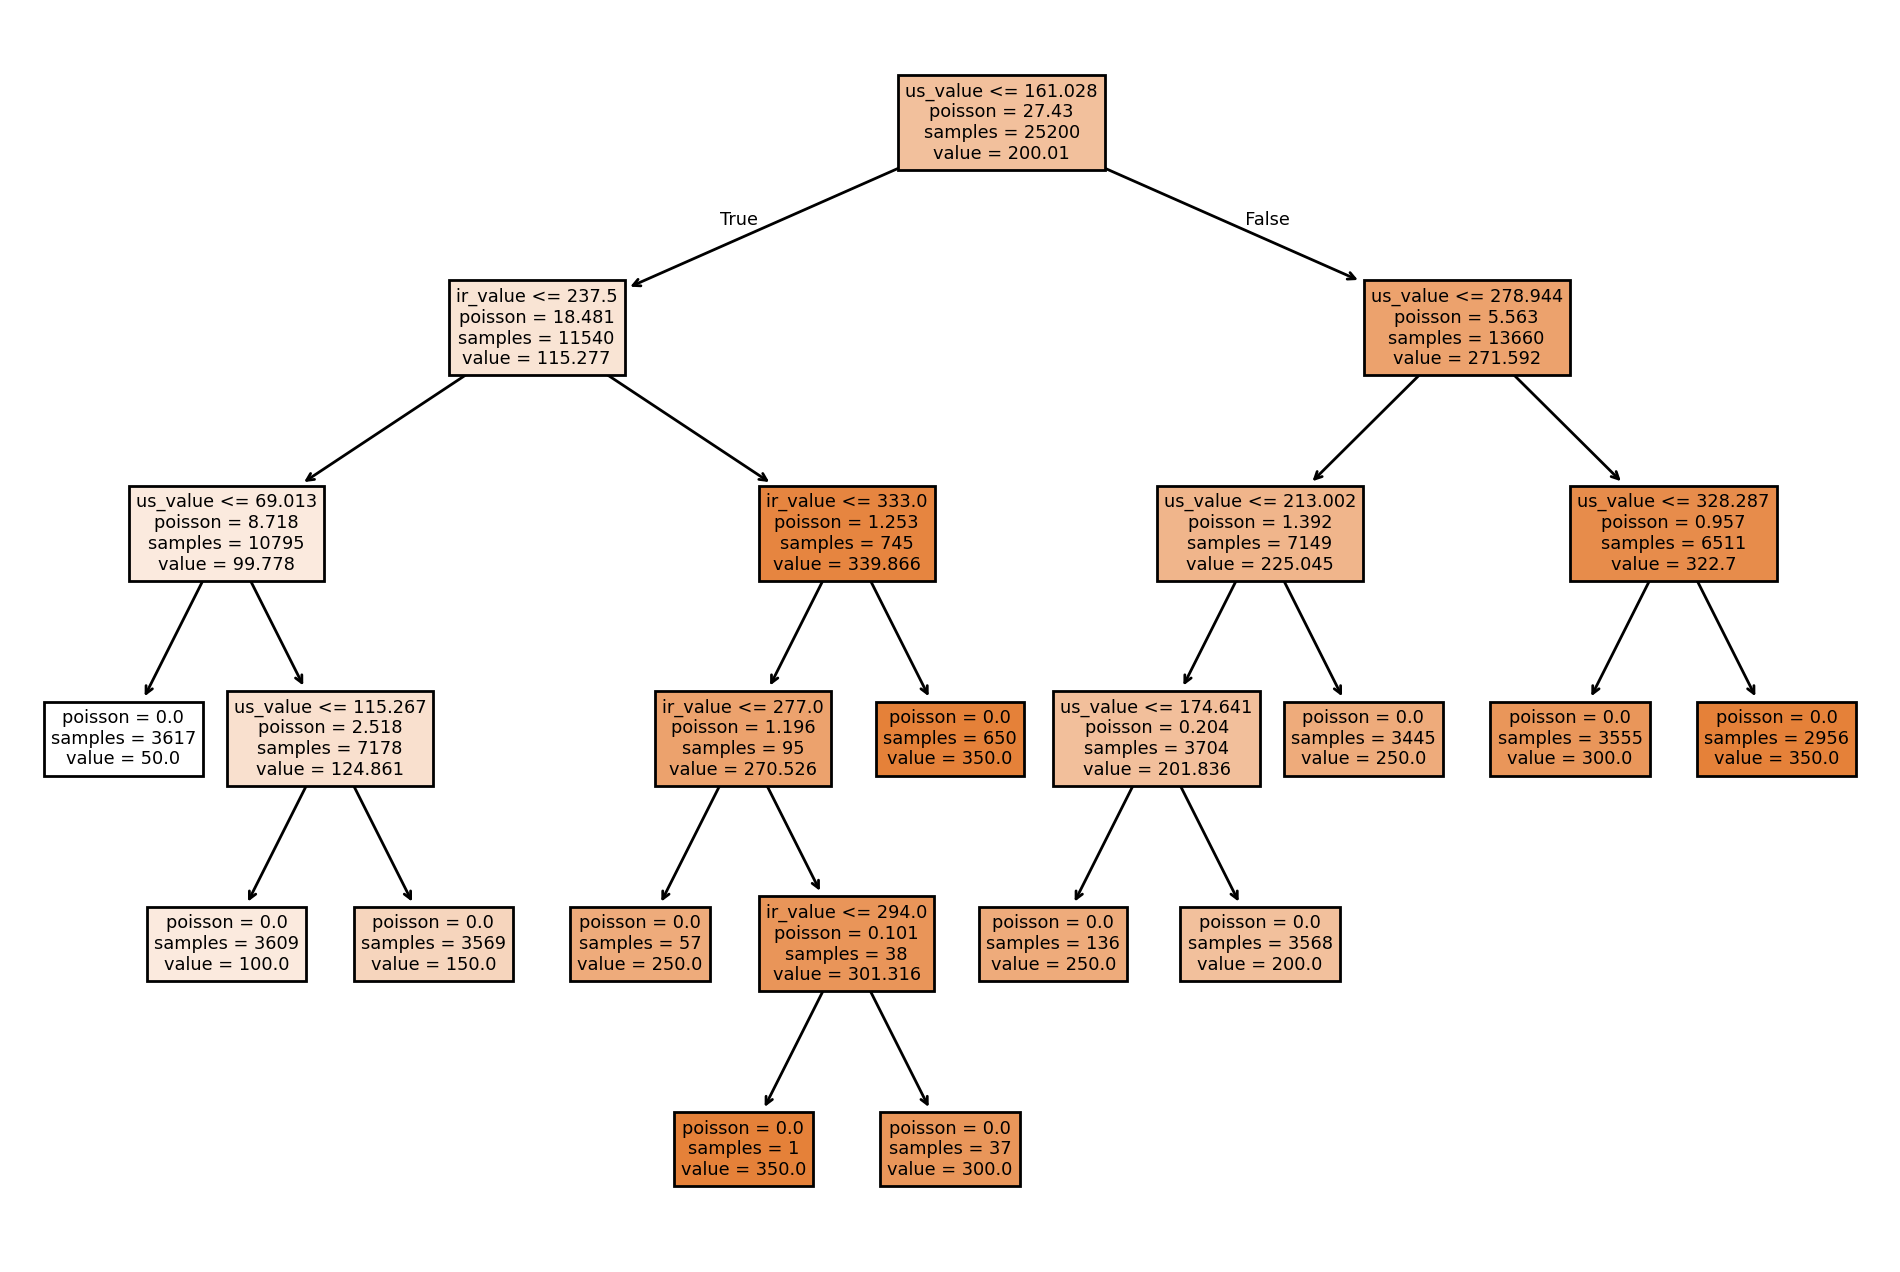

In [34]:
plt.figure(figsize = (12, 8), dpi = 200)
plot_tree(tree_model.best_estimator_, feature_names = X.columns, filled = True);

Make Predictions:

In [35]:
y_pred = tree_model.predict(X_test)

Check Residuals:

Text(0, 0.5, 'residual')

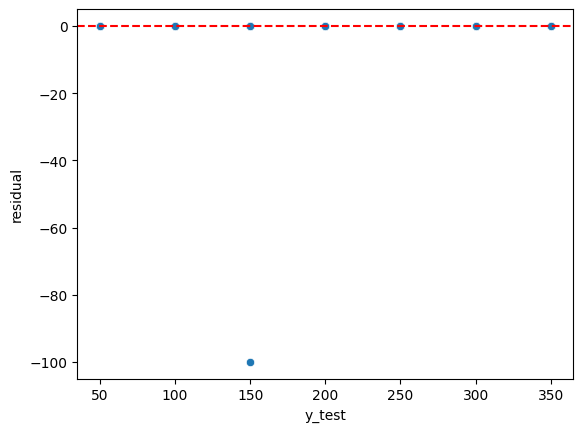

In [36]:
residuals = y_test - y_pred
sns.scatterplot(x = y_test, y = residuals)
plt.axhline(y = 0, color = 'r', ls = '--')
plt.xlabel('y_test')
plt.ylabel('residual')
#There are very few residuals within this model, and their magnitude is relatively low

Log Error And Average Residual To Score Tracker:

In [37]:
score_tracker.loc[3] = ['Single Tree', mean_absolute_error(y_test, y_pred), mean_squared_error(y_test, y_pred), np.sqrt(mean_squared_error(y_test, y_pred)), np.average(residuals)]
score_tracker

Model        MAE         MSE       RMSE  Avg Residual
0   Polynomial   7.167545  233.086205  15.267161     -0.069596
1          KNN   5.146998   98.932233   9.946468     -0.089455
2          SVM  14.626559  774.796042  27.835158      2.353552
3  Single Tree   0.015873    1.587302   1.259882     -0.015873

# Random Forest Model:

In [38]:
from sklearn.ensemble import RandomForestRegressor

In [57]:
random_forest_param_grid = {'n_estimators': [25, 50, 100, 150, 200], 'max_features': [1, 'sqrt', 'log2'], 'bootstrap': [True, False], 'criterion': ['squared_error', 'friedman_mse', 'poisson']}

In [58]:
random_forest_model = GridSearchCV(estimator = RandomForestRegressor(random_state = 42), param_grid = random_forest_param_grid, scoring = 'neg_mean_squared_error', cv = 5, n_jobs = -1, verbose = 2)
random_forest_model.fit(X_train, y_train)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['squared_error', 'friedman_mse',
                                       'poisson'],
                         'max_features': [1, 'sqrt', 'log2'],
                         'n_estimators': [25, 50, 100, 150, 200]},
             scoring='neg_mean_squared_error', verbose=2)

In [59]:
random_forest_model.best_params_

{'bootstrap': False,
 'criterion': 'friedman_mse',
 'max_features': 'sqrt',
 'n_estimators': 200}

# Save Random Forest Model:

In [60]:
dump(random_forest_model, 'random_forest_model.joblib')

['random_forest_model.joblib']

In [39]:
random_forest_model = load('random_forest_model.joblib')

# Random Forest Model Evaluation:

Make Predictions:

In [40]:
y_pred = random_forest_model.predict(X_test)

Check Residuals:

Text(0, 0.5, 'residual')

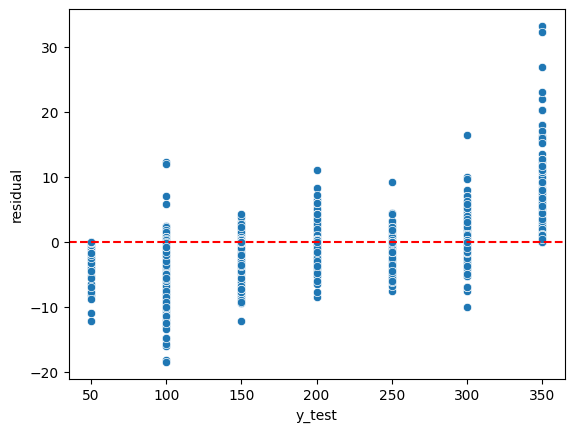

In [41]:
residuals = y_test - y_pred
sns.scatterplot(x = y_test, y = residuals)
plt.axhline(y = 0, color = 'r', ls = '--')
plt.xlabel('y_test')
plt.ylabel('residual')
#The residuals in the end cases are the most skewed, but in opposite directions

Log Error And Average Residual To Score Tracker:

In [42]:
score_tracker.loc[4] = ['Random Forest', mean_absolute_error(y_test, y_pred), mean_squared_error(y_test, y_pred), np.sqrt(mean_squared_error(y_test, y_pred)), np.average(residuals)]
score_tracker

Model        MAE         MSE       RMSE  Avg Residual
0     Polynomial   7.167545  233.086205  15.267161     -0.069596
1            KNN   5.146998   98.932233   9.946468     -0.089455
2            SVM  14.626559  774.796042  27.835158      2.353552
3    Single Tree   0.015873    1.587302   1.259882     -0.015873
4  Random Forest   0.788492    4.249365   2.061399     -0.047222

# AdaBoost Model:

In [43]:
from sklearn.ensemble import AdaBoostRegressor

In [ ]:
adaboost_param_grid = {'n_estimators': [25, 50, 100, 150, 200], 'learning_rate': [0.1, 0.3, 0.5, 0.7, 0.9, 1], 'loss': ['linear', 'square', 'exponential']}

In [74]:
adaboost_model = GridSearchCV(estimator = AdaBoostRegressor(random_state = 42), param_grid = adaboost_param_grid, scoring = 'neg_mean_squared_error', cv = 5, n_jobs = -1, verbose = 2)
adaboost_model.fit(X_train, y_train)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


GridSearchCV(cv=5, estimator=AdaBoostRegressor(random_state=42), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.3, 0.5, 0.7, 0.9, 1],
                         'loss': ['linear', 'square', 'exponential'],
                         'n_estimators': [25, 50, 100, 150, 200]},
             scoring='neg_mean_squared_error', verbose=2)

In [75]:
adaboost_model.best_params_

{'learning_rate': 0.3, 'loss': 'exponential', 'n_estimators': 25}

# Save AdaBoost Model:

In [76]:
dump(adaboost_model, 'adaboost_model.joblib')

['adaboost_model.joblib']

In [44]:
adaboost_model = load('adaboost_model.joblib')

# Adaboost Model Evaluation:

Make Predictions:

In [45]:
y_pred = adaboost_model.predict(X_test)

Check Residuals:

Text(0, 0.5, 'residual')

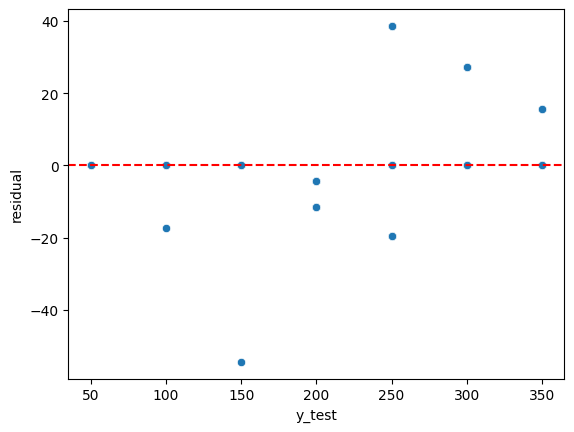

In [46]:
residuals = y_test - y_pred
sns.scatterplot(x = y_test, y = residuals)
plt.axhline(y = 0, color = 'r', ls = '--')
plt.xlabel('y_test')
plt.ylabel('residual')
#The residuals have no clear pattern but are extremely low in magnitude

Log Error And Average Residual To Score Tracker:

In [47]:
score_tracker.loc[5] = ['Adaboost', mean_absolute_error(y_test, y_pred), mean_squared_error(y_test, y_pred), np.sqrt(mean_squared_error(y_test, y_pred)), np.average(residuals)]
score_tracker

Model        MAE         MSE       RMSE  Avg Residual
0     Polynomial   7.167545  233.086205  15.267161     -0.069596
1            KNN   5.146998   98.932233   9.946468     -0.089455
2            SVM  14.626559  774.796042  27.835158      2.353552
3    Single Tree   0.015873    1.587302   1.259882     -0.015873
4  Random Forest   0.788492    4.249365   2.061399     -0.047222
5       Adaboost   1.042154   13.871147   3.724399     -0.624729

# Gradient Boosting Model:

In [48]:
from sklearn.ensemble import GradientBoostingRegressor

In [82]:
gradient_boost_param_grid = {'n_estimators': [25, 50, 100, 150, 200], 'learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2], 'loss': ['squared_error', 'absolute_error', 'huber', 'quantile'], 'criterion': ['friedman_mse', 'squared_error']}

In [85]:
gradient_boost_model = GridSearchCV(estimator = GradientBoostingRegressor(random_state = 42), param_grid = gradient_boost_param_grid, scoring = 'neg_mean_squared_error', cv = 5, n_jobs = -1, verbose = 2)
gradient_boost_model.fit(X_train, y_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['friedman_mse', 'squared_error'],
                         'learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2],
                         'loss': ['squared_error', 'absolute_error', 'huber',
                                  'quantile'],
                         'n_estimators': [25, 50, 100, 150, 200]},
             scoring='neg_mean_squared_error', verbose=2)

In [86]:
gradient_boost_model.best_params_

{'criterion': 'friedman_mse',
 'learning_rate': 0.2,
 'loss': 'squared_error',
 'n_estimators': 200}

# Save Gradient Boost Model:

In [87]:
dump(gradient_boost_model, 'gradient_boost_model.joblib')

['gradient_boost_model.joblib']

In [49]:
gradient_boost_model = load('gradient_boost_model.joblib')

# Gradient Boost Model Evaluation:

Make Predictions:

In [50]:
y_pred = gradient_boost_model.predict(X_test)

Check Residuals:

Text(0, 0.5, 'residual')

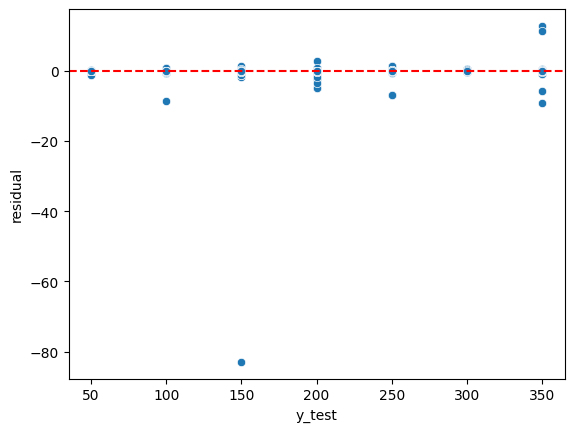

In [51]:
residuals = y_test - y_pred
sns.scatterplot(x = y_test, y = residuals)
plt.axhline(y = 0, color = 'r', ls = '--')
plt.xlabel('y_test')
plt.ylabel('residual')
#There is one outlying residual cluster, but the rest are within 20 in either direction of perfect

Log Error And Average Residual To Score Tracker:

In [52]:
score_tracker.loc[6] = ['Gradient Boost', mean_absolute_error(y_test, y_pred), mean_squared_error(y_test, y_pred), np.sqrt(mean_squared_error(y_test, y_pred)), np.average(residuals)]
score_tracker

Model        MAE         MSE       RMSE  Avg Residual
0      Polynomial   7.167545  233.086205  15.267161     -0.069596
1             KNN   5.146998   98.932233   9.946468     -0.089455
2             SVM  14.626559  774.796042  27.835158      2.353552
3     Single Tree   0.015873    1.587302   1.259882     -0.015873
4   Random Forest   0.788492    4.249365   2.061399     -0.047222
5        Adaboost   1.042154   13.871147   3.724399     -0.624729
6  Gradient Boost   0.060997    1.205036   1.097741     -0.017285

# XGBoost Tree Model:

In [53]:
import xgboost as xgb

In [69]:
xgb_tree_param_grid = {'n_estimators': [50, 100, 200, 500, 1000], 'learning_rate': [0.05, 0.1, 0.2, 0.3, 0.4, 0.5], 'max_depth': [3, 6, 10, 15, 0], 'lambda': [0, 0.1, 0.5, 1, 5, 10, 50, 100], 'alpha': [0, 0.1, 0.5, 1, 5, 10]}

In [70]:
xgb_tree_model = GridSearchCV(estimator = xgb.XGBRegressor(booster = 'gbtree'), param_grid = xgb_tree_param_grid, scoring = 'neg_mean_squared_error', cv = 5, verbose = 2)
xgb_tree_model.fit(scaled_X_train, y_train)

Fitting 5 folds for each of 7200 candidates, totalling 36000 fits
[CV] END alpha=0, lambda=0, learning_rate=0.05, max_depth=3, n_estimators=50; total time=   0.0s
[CV] END alpha=0, lambda=0, learning_rate=0.05, max_depth=3, n_estimators=50; total time=   0.0s
[CV] END alpha=0, lambda=0, learning_rate=0.05, max_depth=3, n_estimators=50; total time=   0.0s
[CV] END alpha=0, lambda=0, learning_rate=0.05, max_depth=3, n_estimators=50; total time=   0.1s
[CV] END alpha=0, lambda=0, learning_rate=0.05, max_depth=3, n_estimators=50; total time=   0.1s
[CV] END alpha=0, lambda=0, learning_rate=0.05, max_depth=3, n_estimators=100; total time=   0.1s
[CV] END alpha=0, lambda=0, learning_rate=0.05, max_depth=3, n_estimators=100; total time=   0.1s
[CV] END alpha=0, lambda=0, learning_rate=0.05, max_depth=3, n_estimators=100; total time=   0.2s
[CV] END alpha=0, lambda=0, learning_rate=0.05, max_depth=3, n_estimators=100; total time=   0.4s
[CV] END alpha=0, lambda=0, learning_rate=0.05, max_depth

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster='gbtree',
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, feature_weights=None,
                                    gamma=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=...
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None, ...),
             param_grid={'alpha': [0, 0.1, 0.5, 1, 5, 10],
                         'lambda': [0, 0.1, 0.5, 1, 5, 10, 50, 100],
                         'learning_rate': [0.05, 0.1, 0.2, 0.3, 0.4, 0.5],
                         'max_depth': [3, 6, 10, 15, 0],
                         'n_estimators': [50, 100, 200, 500, 1000]},
             scoring='neg_mean_squared_error', verbose=2)

In [71]:
xgb_tree_model.best_params_

{'alpha': 1,
 'lambda': 100,
 'learning_rate': 0.4,
 'max_depth': 6,
 'n_estimators': 1000}

# Save XGB Tree Model:

In [72]:
dump(xgb_tree_model, 'xgb_tree_model.joblib')

['xgb_tree_model.joblib']

In [73]:
xgb_tree_model = load('xgb_tree_model.joblib')

# XGB Tree Model Evaluation:

Make Predictions:

In [74]:
y_pred = xgb_tree_model.predict(X_test)

Check Residuals:

Text(0, 0.5, 'residual')

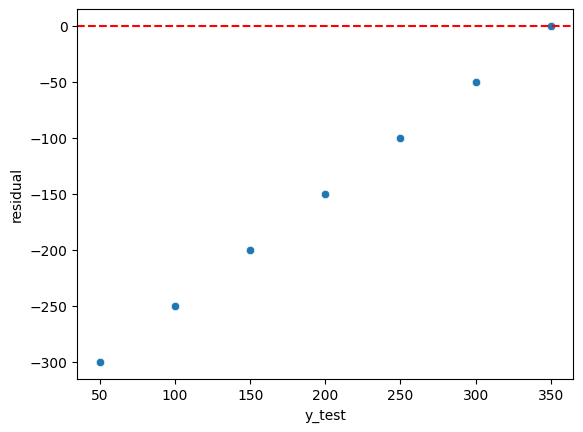

In [ ]:
residuals = y_test - y_pred
sns.scatterplot(x = y_test, y = residuals)
plt.axhline(y = 0, color = 'r', ls = '--')
plt.xlabel('y_test')
plt.ylabel('residual')
#This model does not appear to be suitable to include in the voting model

Log Error And Average Residual To Score Tracker:

In [76]:
score_tracker.loc[7] = ['XGB Tree', mean_absolute_error(y_test, y_pred), mean_squared_error(y_test, y_pred), np.sqrt(mean_squared_error(y_test, y_pred)), np.average(residuals)]
score_tracker

Model         MAE           MSE        RMSE  Avg Residual
0      Polynomial    7.167545    233.086205   15.267161     -0.069596
1             KNN    5.146998     98.932233    9.946468     -0.089455
2             SVM   14.626559    774.796042   27.835158      2.353552
3     Single Tree    0.015873      1.587302    1.259882     -0.015873
4   Random Forest    0.788492      4.249365    2.061399     -0.047222
5        Adaboost    1.042154     13.871147    3.724399     -0.624729
6  Gradient Boost    0.060997      1.205036    1.097741     -0.017285
7        XGB Tree  150.099990  32434.066894  180.094605   -150.099621

# XGBoost Dart Model:

In [ ]:
xgb_dart_param_grid = {}

# XGBoost Linear Model:

In [ ]:
xgb_linear_param_grid = {}

# Cumulative Voting Model:

In [77]:
from sklearn.ensemble import VotingRegressor

# Create Scaling Pipelines For Models That Require Scaling:

In [78]:
poly_pipe = Pipeline(steps = [('poly', PolynomialFeatures(degree = 2, include_bias = False)), ('scaler', StandardScaler()), ('model', ElasticNet(alpha = 0.1, l1_ratio = 0.99, max_iter = 10000))])

In [79]:
knn_pipe = Pipeline(steps = [('scaler', StandardScaler()), ('model', KNeighborsRegressor(n_neighbors = 10, p = 1, weights = 'distance'))])

In [80]:
svm_pipe = Pipeline(steps = [('scaler', StandardScaler()), ('model', SVR(C = 1, degree = 2, epsilon = 0.01, gamma = 'auto', kernel = 'rbf'))])

# Build Model:

In [81]:
voting_model = VotingRegressor(estimators = [('pr', poly_pipe), ('knn', knn_pipe), ('svm', svm_pipe), ('tree', tree_model), ('rf', random_forest_model), ('ab', adaboost_model), ('gb', gradient_boost_model)])
voting_model.fit(X_train, y_train)

Fitting 5 folds for each of 84 candidates, totalling 420 fits
Fitting 5 folds for each of 90 candidates, totalling 450 fits
Fitting 5 folds for each of 90 candidates, totalling 450 fits
Fitting 5 folds for each of 200 candidates, totalling 1000 fits


VotingRegressor(estimators=[('pr',
                             Pipeline(steps=[('poly',
                                              PolynomialFeatures(include_bias=False)),
                                             ('scaler', StandardScaler()),
                                             ('model',
                                              ElasticNet(alpha=0.1,
                                                         l1_ratio=0.99,
                                                         max_iter=10000))])),
                            ('knn',
                             Pipeline(steps=[('scaler', StandardScaler()),
                                             ('model',
                                              KNeighborsRegressor(n_neighbors=10,
                                                                  p=1,
                                                                  weights='distance'))])),
                            ('svm',
                             Pipeline(steps=[('scaler', Stan...
                                          scoring='neg_mean_squared_error',
                                          verbose=2)),
                            ('gb',
                             GridSearchCV(cv=5,
                                          estimator=GradientBoostingRegressor(random_state=42),
                                          n_jobs=-1,
                                          param_grid={'criterion': ['friedman_mse',
                                                                    'squared_error'],
                                                      'learning_rate': [0.01,
                                                                        0.05,
                                                                        0.1,
                                                                        0.15,
                                                                        0.2],
                                                      'loss': ['squared_error',
                                                               'absolute_error',
                                                               'huber',
                                                               'quantile'],
                                                      'n_estimators': [25, 50,
                                                                       100, 150,
                                                                       200]},
                                          scoring='neg_mean_squared_error',
                                          verbose=2))])

# Save Voting Model:

In [82]:
dump(voting_model, 'voting_model.joblib')

['voting_model.joblib']

In [83]:
voting_model = load('voting_model.joblib')

# Voting Model Evaluation:

Make Predictions:

In [84]:
y_pred = voting_model.predict(X_test)

Check Residuals:

Text(0, 0.5, 'residual')

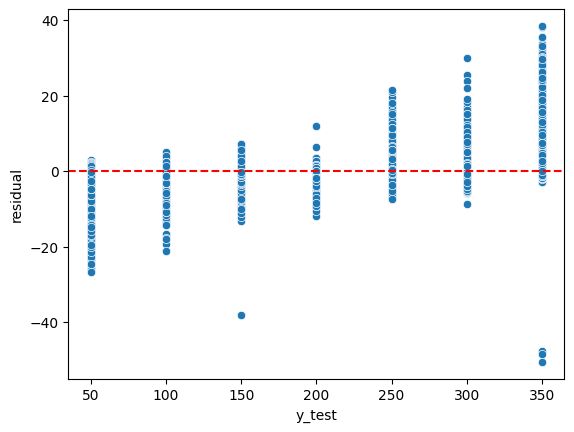

In [85]:
residuals = y_test - y_pred
sns.scatterplot(x = y_test, y = residuals)
plt.axhline(y = 0, color = 'r', ls = '--')
plt.xlabel('y_test')
plt.ylabel('residual')

Log Error And Average Residual To Score Tracker:

In [86]:
score_tracker.loc[8] = ['Voting', mean_absolute_error(y_test, y_pred), mean_squared_error(y_test, y_pred), np.sqrt(mean_squared_error(y_test, y_pred)), np.average(residuals)]
score_tracker

Model         MAE           MSE        RMSE  Avg Residual
0      Polynomial    7.167545    233.086205   15.267161     -0.069596
1             KNN    5.146998     98.932233    9.946468     -0.089455
2             SVM   14.626559    774.796042   27.835158      2.353552
3     Single Tree    0.015873      1.587302    1.259882     -0.015873
4   Random Forest    0.788492      4.249365    2.061399     -0.047222
5        Adaboost    1.042154     13.871147    3.724399     -0.624729
6  Gradient Boost    0.060997      1.205036    1.097741     -0.017285
7        XGB Tree  150.099990  32434.066894  180.094605   -150.099621
8          Voting    3.430107     33.616491    5.797973      0.213314